In [132]:
import pandas as pd

In [133]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

In [134]:
df = pd.read_csv('observations.csv')

In [135]:
df

,satellite_name,norad_cat_id,observation_time_utc,observation_time_uncertainty_sec,apparent_magnitude,apparent_magnitude_uncertainty,observer_latitude_deg,observer_longitude_deg,observer_altitude_m,limiting_magnitude,...,sat_dec_deg_satchecker,range_to_sat_km_satchecker,range_rate_sat_km_s_satchecker,ddec_deg_s_satchecker,dra_cosdec_deg_s_satchecker,phase_angle_deg_satchecker,alt_deg_satchecker,az_deg_satchecker,illuminated,international_designator
0,STARLINK-3729,52135,2024-04-06T01:48:35.000Z,0.3,5.90,0.2,36.00,-96.000,201.0,6.0,...,-12.997353,1532.071164,6.324609,-0.129750,0.046261,10.535559,14.336905,118.393897,True,2022-029AZ
1,STARLINK-3723,52138,2024-04-06T01:49:52.000Z,0.3,6.70,0.2,36.00,-96.000,201.0,6.0,...,34.252031,643.615668,2.350126,-0.582193,0.202330,48.082851,55.777765,80.522038,True,2022-029BC
2,STARLINK-31137,58686,2024-04-06T01:51:50.000Z,0.3,5.20,0.2,36.00,-96.000,201.0,6.0,...,8.524921,809.796179,3.628451,0.173734,0.413865,21.421663,34.357218,106.152593,True,2023-211V
3,STARLINK-31144,58682,2024-04-06T01:54:00.000Z,0.3,5.20,0.2,36.00,-96.000,201.0,6.0,...,-6.720174,670.741047,-0.925428,0.271247,0.556386,52.375180,44.816216,158.276279,True,2023-211R
4,STARLINK-3720,52136,2024-04-06T01:55:44.000Z,0.3,7.30,0.2,36.00,-96.000,201.0,6.0,...,18.839904,678.063641,3.741248,-0.487323,0.211507,37.513397,51.193413,105.709173,True,2022-029BA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2244,STARLINK-30130,56697,2023-07-11T19:36:33.000Z,0.3,6.10,0.1,43.65,41.431,2030.0,10.0,...,26.764438,585.211449,-2.361318,0.026909,0.672972,70.364880,62.623196,240.525263,True,2023-067K
2245,STARLINK-30130,56697,2023-07-11T19:36:38.000Z,0.3,5.99,0.1,43.65,41.431,2030.0,10.0,...,26.846742,574.339199,-1.983998,0.005568,0.698013,67.796389,65.026967,235.029992,True,2023-067K
2246,STARLINK-30130,56697,2023-07-11T19:36:41.000Z,0.3,5.89,0.1,43.65,41.431,2030.0,10.0,...,26.842808,568.739762,-1.747799,-0.008344,0.711169,66.229559,66.390752,231.136107,True,2023-067K
2247,STARLINK-30130,56697,2023-07-11T19:36:49.000Z,0.3,5.77,0.1,43.65,41.431,2030.0,10.0,...,26.618204,557.371772,-1.087500,-0.048399,0.737629,62.002158,69.511839,218.122221,True,2023-067K


In [136]:
df2=df.sort_values(by='norad_cat_id').reset_index()

In [137]:
df2['index']=df2.index

In [138]:
df2

,index,satellite_name,norad_cat_id,observation_time_utc,observation_time_uncertainty_sec,apparent_magnitude,apparent_magnitude_uncertainty,observer_latitude_deg,observer_longitude_deg,observer_altitude_m,...,sat_dec_deg_satchecker,range_to_sat_km_satchecker,range_rate_sat_km_s_satchecker,ddec_deg_s_satchecker,dra_cosdec_deg_s_satchecker,phase_angle_deg_satchecker,alt_deg_satchecker,az_deg_satchecker,illuminated,international_designator
0,0,STARLINK-3504,51881,2024-08-01T02:28:50.000Z,0.2,6.5,0.5,36.128,-95.988,201.0,...,25.574883,664.214564,3.196443,-0.531754,0.198028,47.132631,52.920553,94.460894,True,2022-022AF
1,1,STARLINK-3577,51884,2024-08-01T02:34:30.000Z,0.2,5.5,0.5,36.128,-95.988,201.0,...,16.567287,672.286109,3.834121,-0.478561,0.230426,40.756326,51.915492,110.957442,True,2022-022AJ
2,2,STARLINK-3597,51898,2024-08-01T02:56:02.000Z,0.2,8.0,0.5,36.128,-95.988,201.0,...,10.713078,596.216041,1.677877,-0.458669,0.509832,64.520295,64.137522,191.405474,True,2022-022AY
3,3,STARLINK-3661,52129,2024-04-06T02:17:46.000Z,0.3,5.9,0.2,36.000,-96.000,201.0,...,-0.558597,672.953099,3.782391,-0.379029,0.376982,50.680333,51.752153,160.897103,True,2022-029AT
4,4,STARLINK-3711,52131,2024-04-06T02:12:02.000Z,0.3,5.0,0.2,36.000,-96.000,201.0,...,10.324251,609.112649,3.086562,-0.470627,0.411249,52.639086,61.456721,151.275760,True,2022-029AV
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2244,2244,STARLINK-11250,60910,2024-10-10T01:09:09.000Z,0.2,6.0,0.5,36.128,-95.988,201.0,...,40.431658,343.355441,-0.101918,-0.900648,0.852416,71.343044,84.497351,35.981234,True,2024-154H
2245,2245,STARLINK-11273,60913,2024-10-10T00:47:16.000Z,0.2,6.0,0.5,36.128,-95.988,201.0,...,58.045225,492.418005,0.009191,-0.862580,-0.030160,52.733836,42.492762,40.707887,True,2024-154L
2246,2246,STARLINK-11317,61248,2024-10-12T11:41:22.000Z,0.2,3.5,0.5,36.128,-95.988,201.0,...,39.023773,343.332639,-0.136735,0.916190,0.835665,75.001930,84.531897,303.618200,True,2024-175F
2247,2247,STARLINK-11293,61249,2024-10-12T11:34:02.000Z,0.2,4.0,0.5,36.128,-95.988,201.0,...,25.102611,351.312504,-0.152262,0.779334,0.929077,87.300615,76.161723,140.417034,True,2024-175G


In [139]:
#starlink sorting based on Gunther's space page https://space.skyrocket.de/doc_sdat/starlink-v1-0.htm
sid = []
gen = []
for i in df2['satellite_name'].values:
    try:
        sidint = int(i[9:14])
    except:
        sidint = 0
    sid.append(i[9:])
    if sidint > 30000:
        gen.append("v2mini")
    elif (sidint < 30000 and sidint > 11000):
        gen.append("DTC")
    elif (sidint < 7000 and sidint > 3000):
        gen.append("v1.5")
    elif (sidint < 3000 and sidint > 1000):
        gen.append("v1.0") 
    elif (sidint == 1130):
        gen.append("DarkSat")
    elif (sidint < 100 and sidint > 0):
        gen.append("v0.9")       
    else:
        gen.append('unknown')
df2['starlink-id'] = sid
df2['starlink-gen'] = gen

In [140]:
df2

,index,satellite_name,norad_cat_id,observation_time_utc,observation_time_uncertainty_sec,apparent_magnitude,apparent_magnitude_uncertainty,observer_latitude_deg,observer_longitude_deg,observer_altitude_m,...,range_rate_sat_km_s_satchecker,ddec_deg_s_satchecker,dra_cosdec_deg_s_satchecker,phase_angle_deg_satchecker,alt_deg_satchecker,az_deg_satchecker,illuminated,international_designator,starlink-id,starlink-gen
0,0,STARLINK-3504,51881,2024-08-01T02:28:50.000Z,0.2,6.5,0.5,36.128,-95.988,201.0,...,3.196443,-0.531754,0.198028,47.132631,52.920553,94.460894,True,2022-022AF,3504,v1.5
1,1,STARLINK-3577,51884,2024-08-01T02:34:30.000Z,0.2,5.5,0.5,36.128,-95.988,201.0,...,3.834121,-0.478561,0.230426,40.756326,51.915492,110.957442,True,2022-022AJ,3577,v1.5
2,2,STARLINK-3597,51898,2024-08-01T02:56:02.000Z,0.2,8.0,0.5,36.128,-95.988,201.0,...,1.677877,-0.458669,0.509832,64.520295,64.137522,191.405474,True,2022-022AY,3597,v1.5
3,3,STARLINK-3661,52129,2024-04-06T02:17:46.000Z,0.3,5.9,0.2,36.000,-96.000,201.0,...,3.782391,-0.379029,0.376982,50.680333,51.752153,160.897103,True,2022-029AT,3661,v1.5
4,4,STARLINK-3711,52131,2024-04-06T02:12:02.000Z,0.3,5.0,0.2,36.000,-96.000,201.0,...,3.086562,-0.470627,0.411249,52.639086,61.456721,151.275760,True,2022-029AV,3711,v1.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2244,2244,STARLINK-11250,60910,2024-10-10T01:09:09.000Z,0.2,6.0,0.5,36.128,-95.988,201.0,...,-0.101918,-0.900648,0.852416,71.343044,84.497351,35.981234,True,2024-154H,11250,DTC
2245,2245,STARLINK-11273,60913,2024-10-10T00:47:16.000Z,0.2,6.0,0.5,36.128,-95.988,201.0,...,0.009191,-0.862580,-0.030160,52.733836,42.492762,40.707887,True,2024-154L,11273,DTC
2246,2246,STARLINK-11317,61248,2024-10-12T11:41:22.000Z,0.2,3.5,0.5,36.128,-95.988,201.0,...,-0.136735,0.916190,0.835665,75.001930,84.531897,303.618200,True,2024-175F,11317,DTC
2247,2247,STARLINK-11293,61249,2024-10-12T11:34:02.000Z,0.2,4.0,0.5,36.128,-95.988,201.0,...,-0.152262,0.779334,0.929077,87.300615,76.161723,140.417034,True,2024-175G,11293,DTC


In [141]:
grp=df2.groupby('starlink-gen')

In [142]:
grp.groups

{'DTC': [2232, 2233, 2235, 2236, 2237, 2238, 2239, 2242, 2243, 2244, 2245, 2246, 2247], 'v1.5': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13], 'v2mini': [14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, ...]}

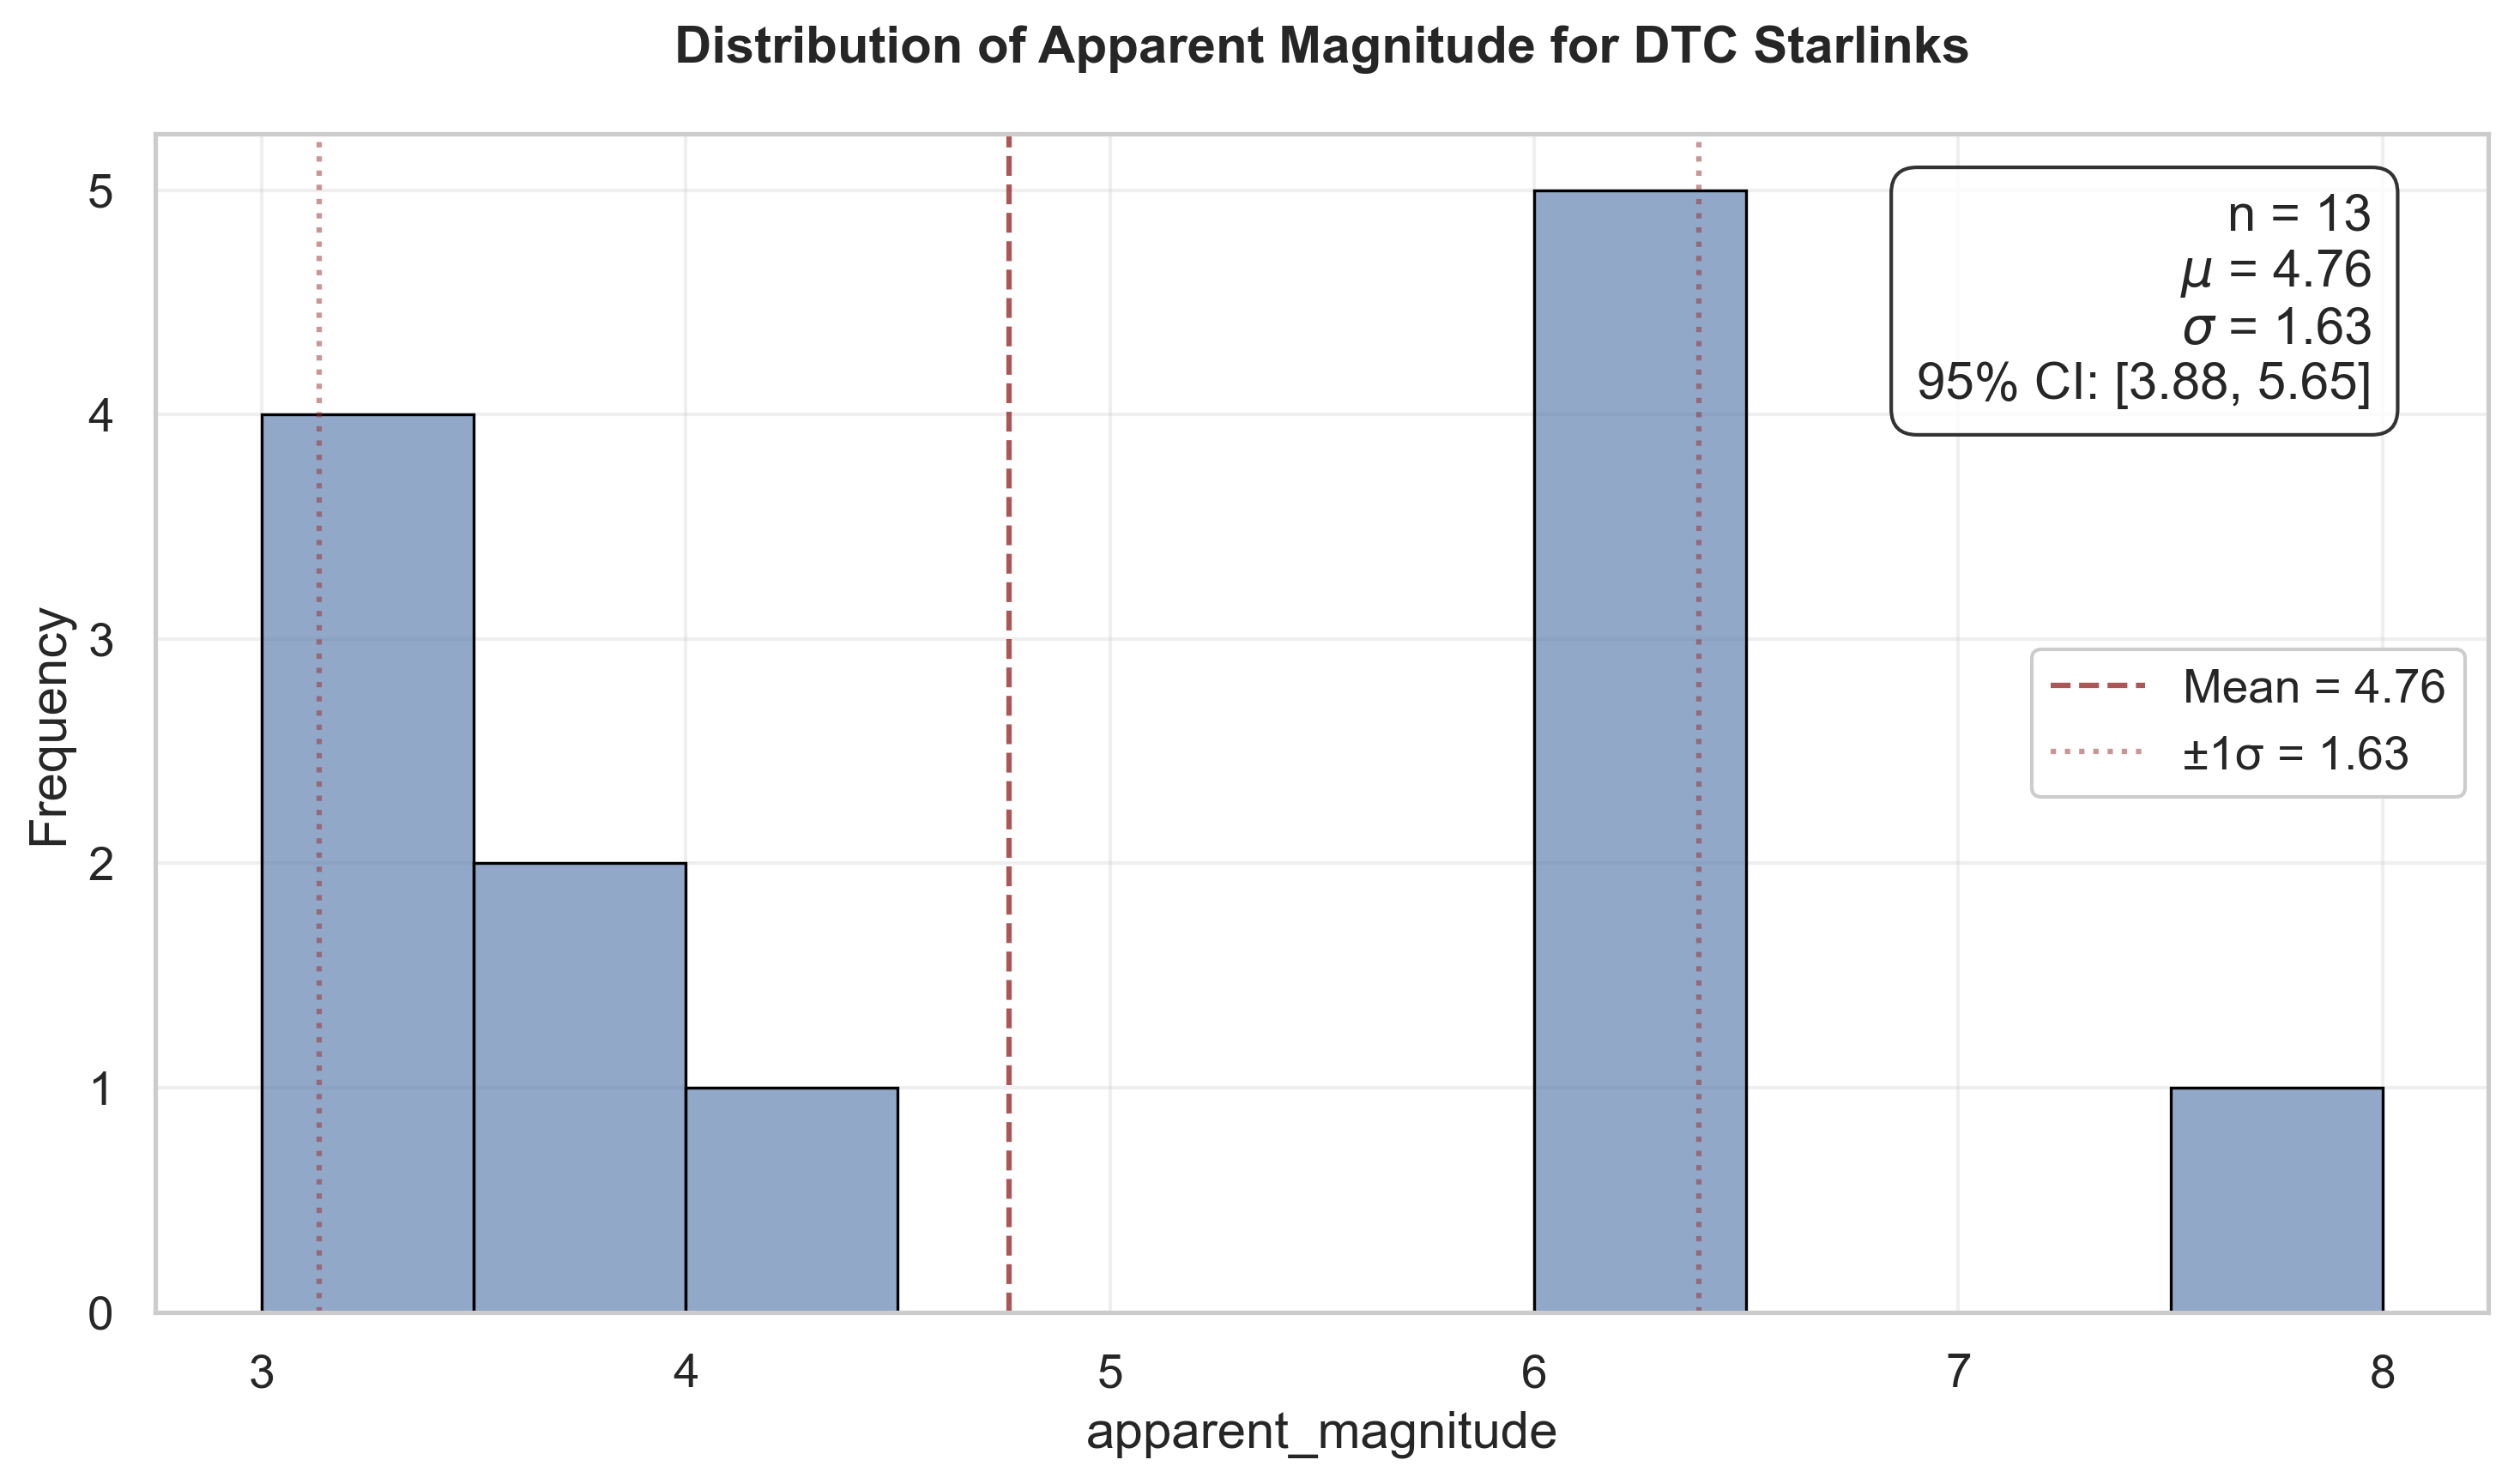

In [156]:
# Set style
sns.set_theme(style="whitegrid", font_scale=1.2)

fig, ax = plt.subplots(figsize=(10, 6), dpi=300)

# Get the data
data = grp.get_group("DTC")['apparent_magnitude']
mean = data.mean()
std = data.std()
n = len(data)

sns.histplot(data=data,
            bins=10,
            stat='count',
            color='#4A6FA5',
            alpha=0.6,
            edgecolor='black',
            linewidth=0.8)


# Add mean and ±1 std dev lines
ax.axvline(mean, color='#962D2D', linestyle='--', alpha=0.8, 
           label=f'Mean = {mean:.2f}')
ax.axvline(mean + std, color='#962D2D', linestyle=':', alpha=0.5,
           label=f'±1σ = {std:.2f}')
ax.axvline(mean - std, color='#962D2D', linestyle=':', alpha=0.5)

# Calculate confidence interval
ci = stats.norm.interval(0.95, loc=mean, scale=std/np.sqrt(n))

ax.set_xlabel('apparent_magnitude')
ax.set_ylabel('Count')         
ax.set_title('Distribution of Apparent Magnitude for DTC Starlinks', 
             pad=20, fontweight='bold')

# Add statistical information
stats_text = (
    f'n = {n}\n'
    f'$\mu$ = {mean:.2f}\n'
    f'$\sigma$ = {std:.2f}\n'
    f'95% CI: [{ci[0]:.2f}, {ci[1]:.2f}]'
)

# Add text box with statistics
plt.text(0.95, 0.95, stats_text,
         transform=ax.transAxes,
         verticalalignment='top',
         horizontalalignment='right',
         bbox=dict(facecolor='white', 
                  edgecolor='black',
                  alpha=0.8,
                  boxstyle='round,pad=0.5'))

ax.legend(frameon=True, facecolor='white', framealpha=1)

plt.tight_layout()

plt.show()

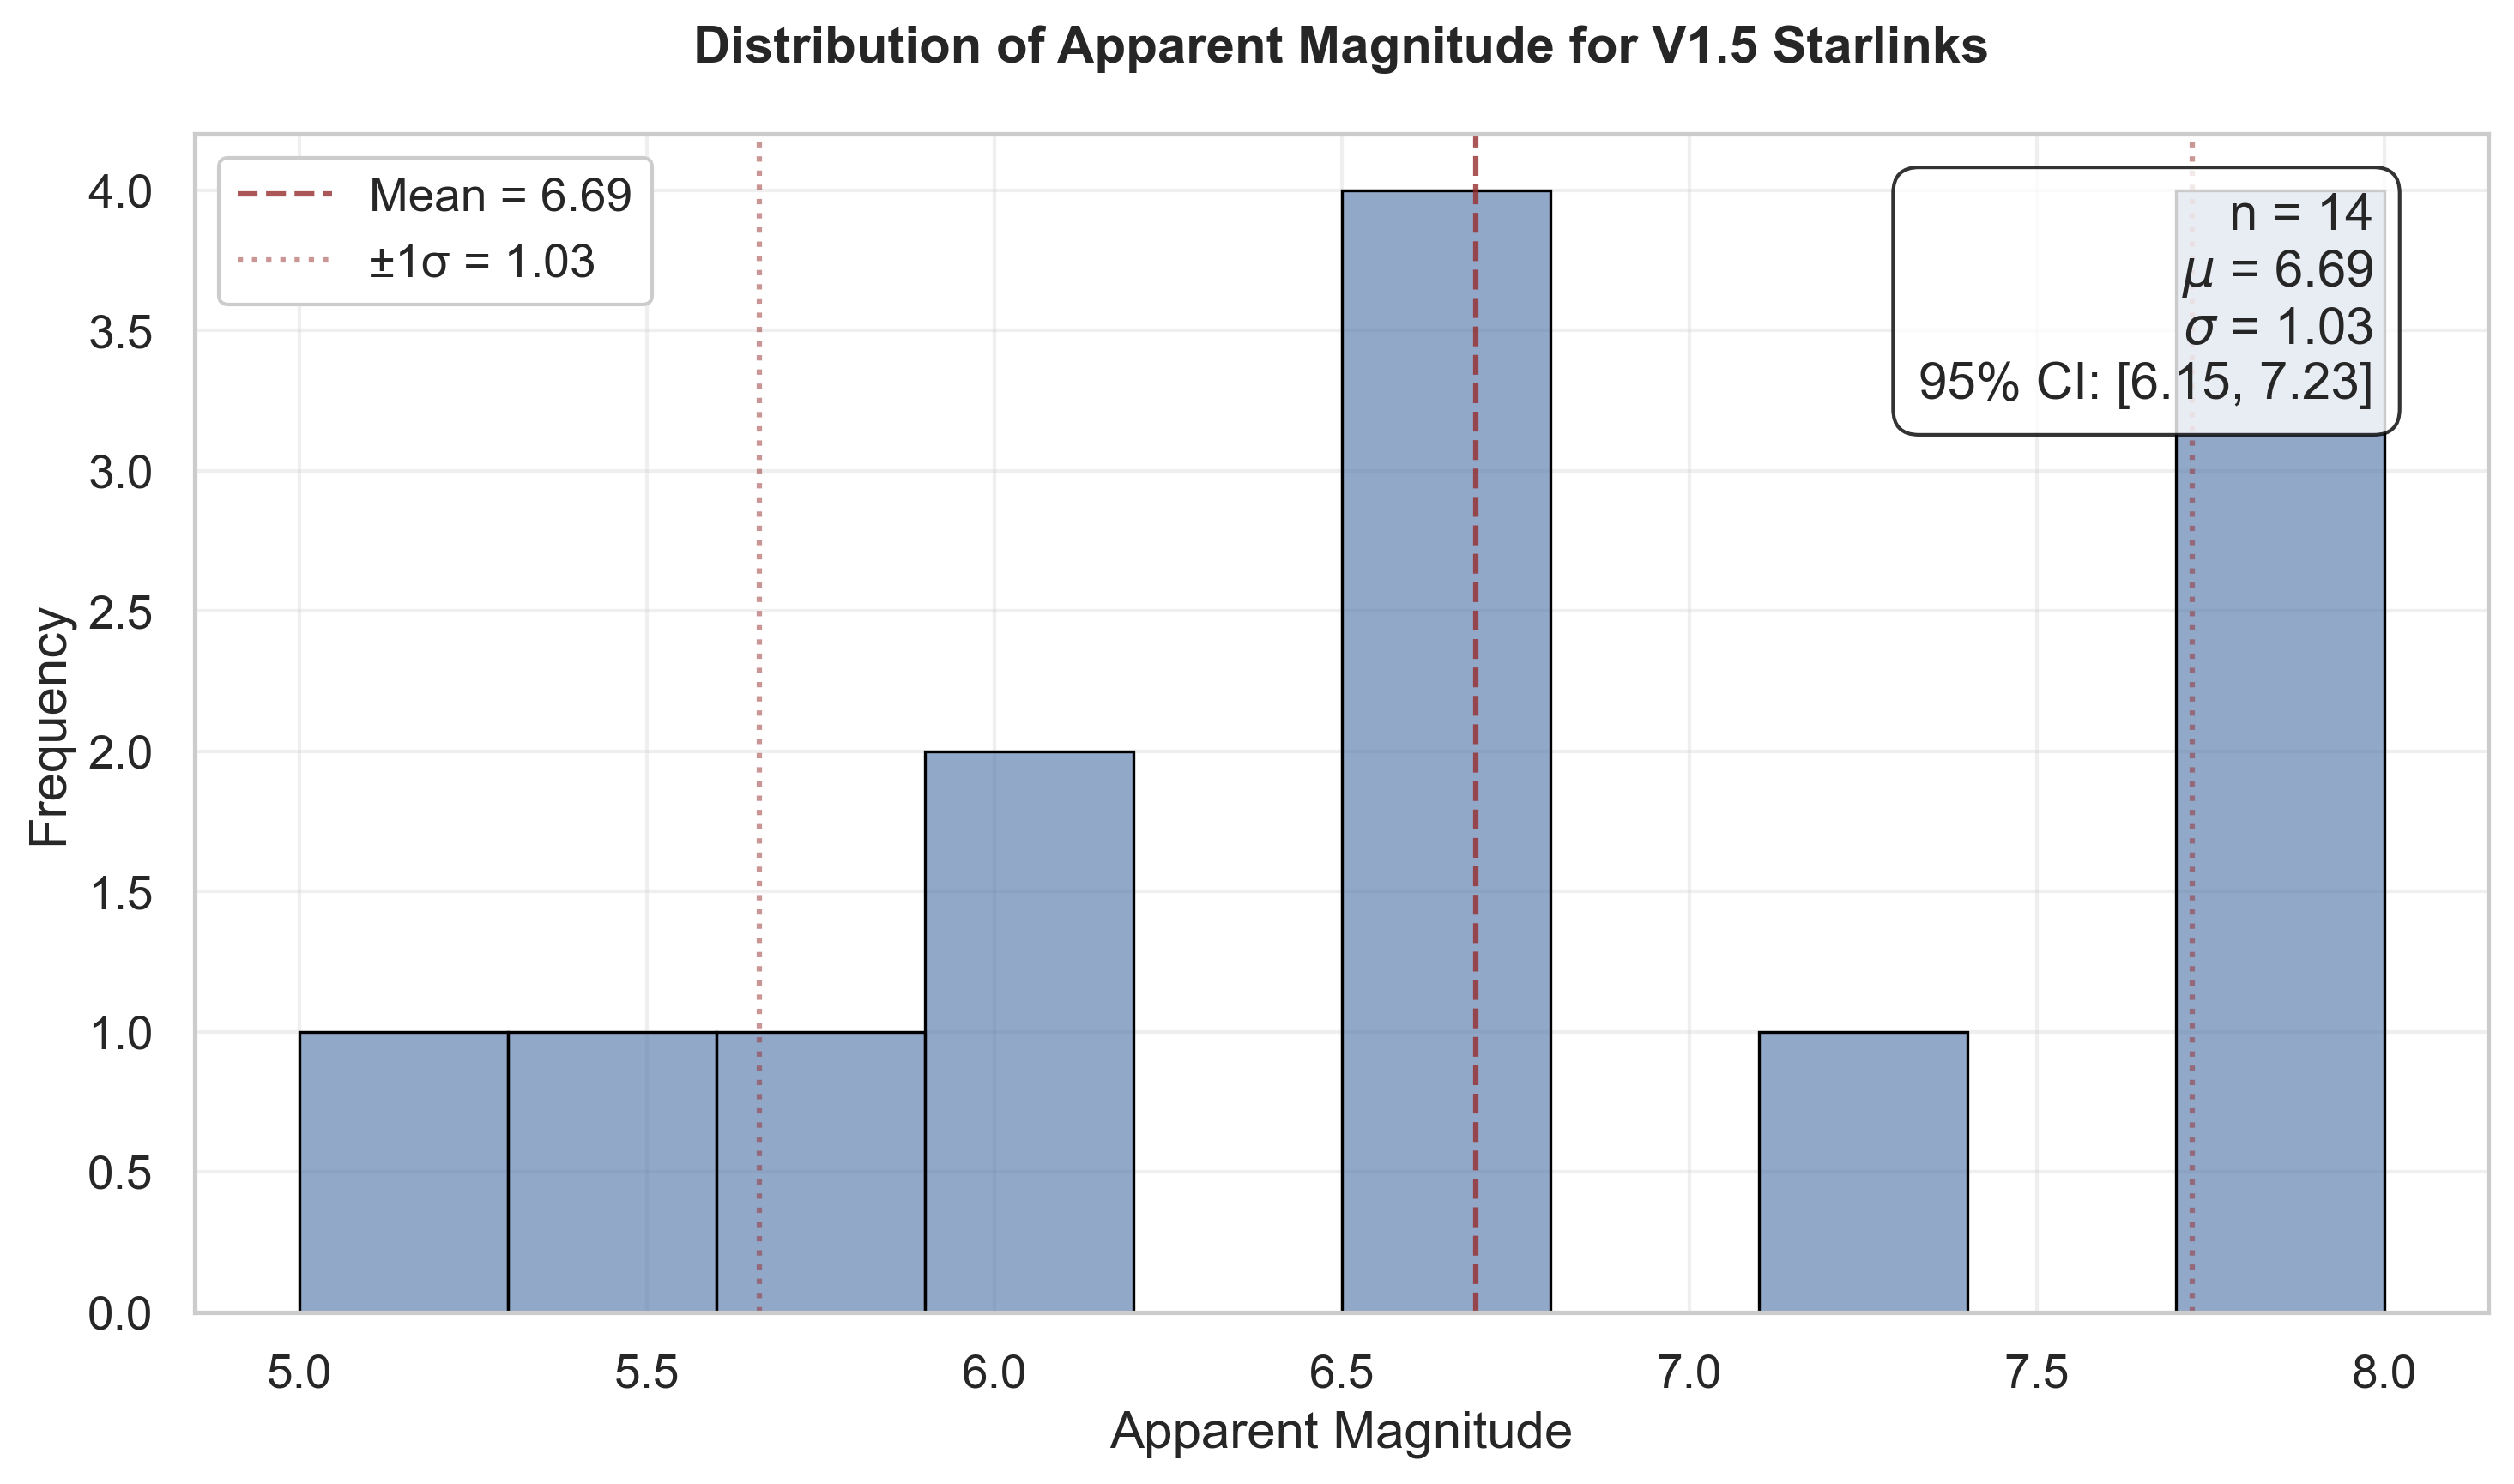

In [144]:
# Create figure and axis
fig, ax = plt.subplots(figsize=(10, 6), dpi=300)

# Get the data for V1.5 group
data = grp.get_group("v1.5")['apparent_magnitude']
mean = data.mean()
std = data.std()
n = len(data)

sns.histplot(data=data,
            bins=10, 
            stat='count',
            color='#4A6FA5',
            alpha=0.6,
            edgecolor='black',
            linewidth=0.8)

ax.axvline(mean, color='#962D2D', linestyle='--', alpha=0.8, 
           label=f'Mean = {mean:.2f}')
ax.axvline(mean + std, color='#962D2D', linestyle=':', alpha=0.5,
           label=f'±1σ = {std:.2f}')
ax.axvline(mean - std, color='#962D2D', linestyle=':', alpha=0.5)

ci = stats.norm.interval(0.95, loc=mean, scale=std/np.sqrt(n))

ax.set_xlabel('Apparent Magnitude')
ax.set_ylabel('Count')
ax.set_title('Distribution of Apparent Magnitude for V1.5 Starlinks', 
             pad=20, fontweight='bold')

stats_text = (
    f'n = {n}\n'
    f'$\mu$ = {mean:.2f}\n'
    f'$\sigma$ = {std:.2f}\n'
    f'95% CI: [{ci[0]:.2f}, {ci[1]:.2f}]'
)

plt.text(0.95, 0.95, stats_text,
         transform=ax.transAxes,
         verticalalignment='top',
         horizontalalignment='right',
         bbox=dict(facecolor='white', 
                  edgecolor='black',
                  alpha=0.8,
                  boxstyle='round,pad=0.5'))

ax.legend(frameon=True, facecolor='white', framealpha=1)

plt.tight_layout()

plt.show()

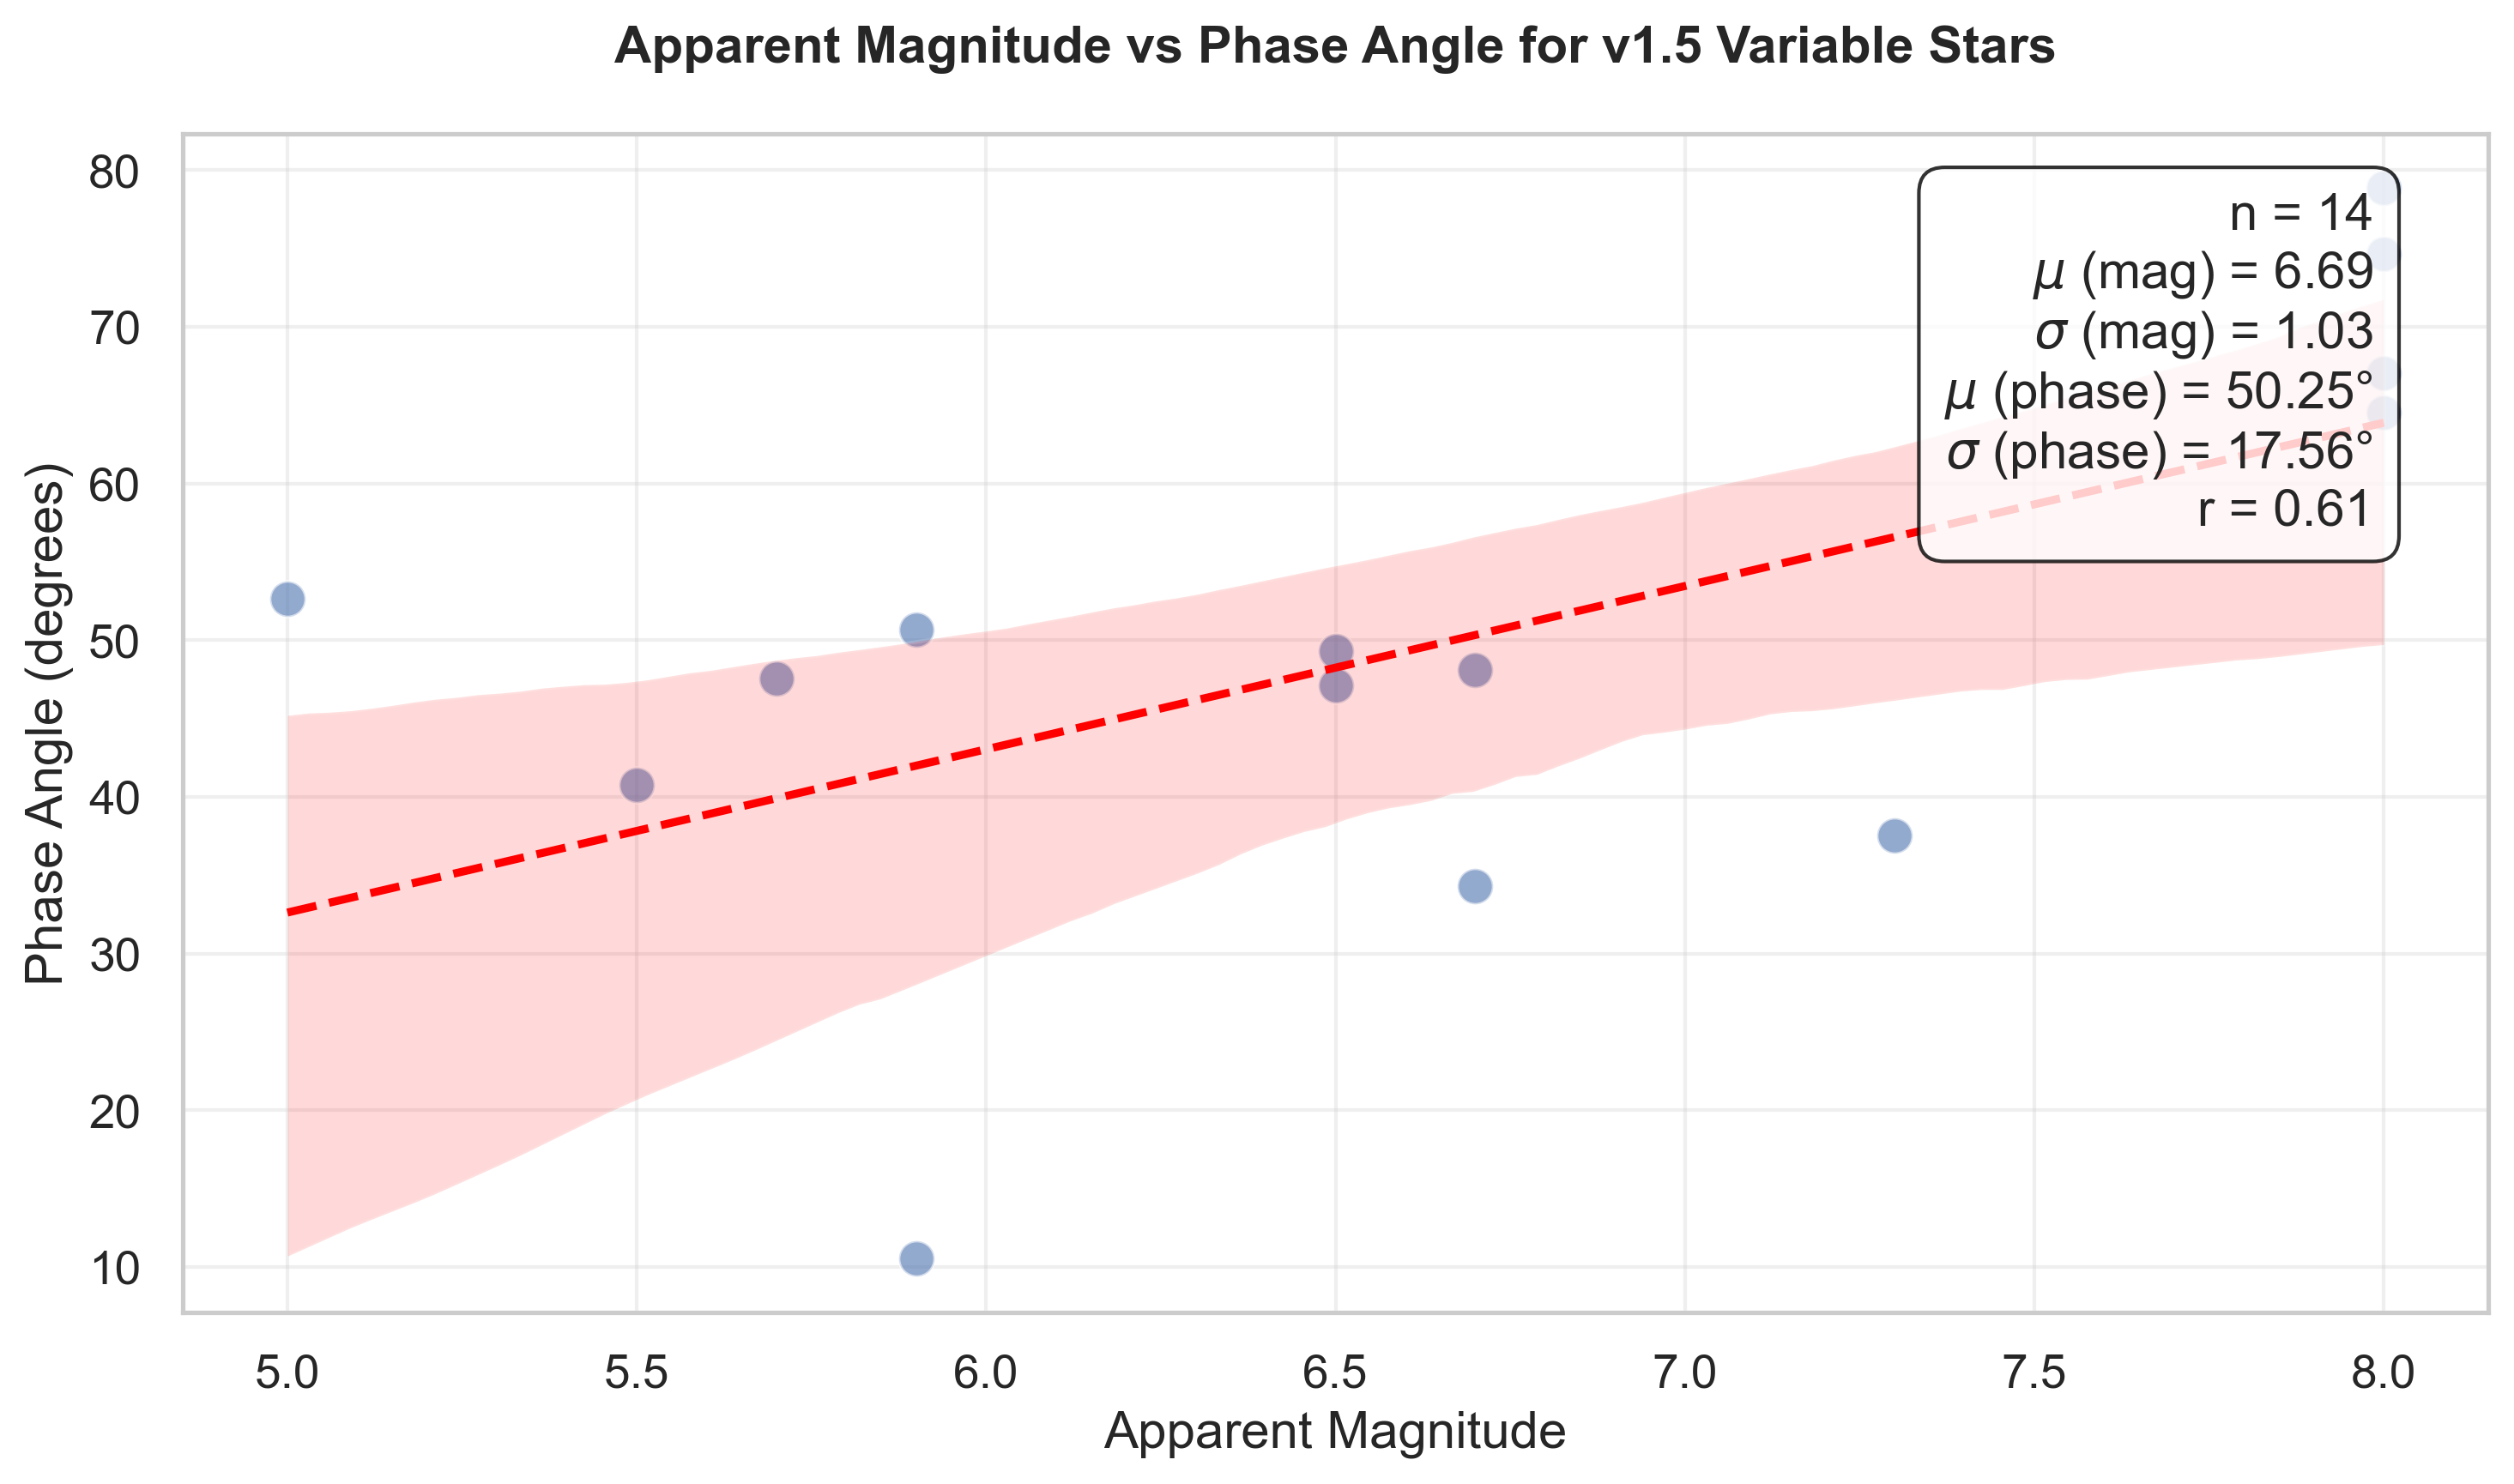

In [145]:
# Create figure and axis
fig, ax = plt.subplots(figsize=(10, 6), dpi=300)

# Get the data for v1.5 group
data = grp.get_group("v1.5")

# Create scatter plot
sns.scatterplot(data=data,
                x='apparent_magnitude',
                y='phase_angle_deg_satchecker',
                s=100,
                alpha=0.6)

# Add trend line
sns.regplot(data=data,
            x='apparent_magnitude',
            y='phase_angle_deg_satchecker',
            scatter=False,
            color='red',
            line_kws={'linestyle': '--'})

# Customize axes
ax.set_xlabel('Apparent Magnitude')
ax.set_ylabel('Phase Angle (degrees)')
ax.set_title('Apparent Magnitude vs Phase Angle for v1.5 Starlinks', 
             pad=20, fontweight='bold')

# Add statistical information
mag_mean = data['apparent_magnitude'].mean()
mag_std = data['apparent_magnitude'].std()
phase_mean = data['phase_angle_deg_satchecker'].mean()
phase_std = data['phase_angle_deg_satchecker'].std()
n = len(data)

# Calculate correlation coefficient
corr = data['apparent_magnitude'].corr(data['phase_angle_deg_satchecker'])

stats_text = (
    f'n = {n}\n'
    f'$\mu$ (mag) = {mag_mean:.2f}\n'
    f'$\sigma$ (mag) = {mag_std:.2f}\n'
    f'$\mu$ (phase) = {phase_mean:.2f}°\n'
    f'$\sigma$ (phase) = {phase_std:.2f}°\n'
    f'r = {corr:.2f}'  # Correlation coefficient
)

plt.text(0.95, 0.95, stats_text,
         transform=ax.transAxes,
         verticalalignment='top',
         horizontalalignment='right',
         bbox=dict(facecolor='white', 
                  edgecolor='black',
                  alpha=0.8,
                  boxstyle='round,pad=0.5'))

plt.tight_layout()
plt.show()

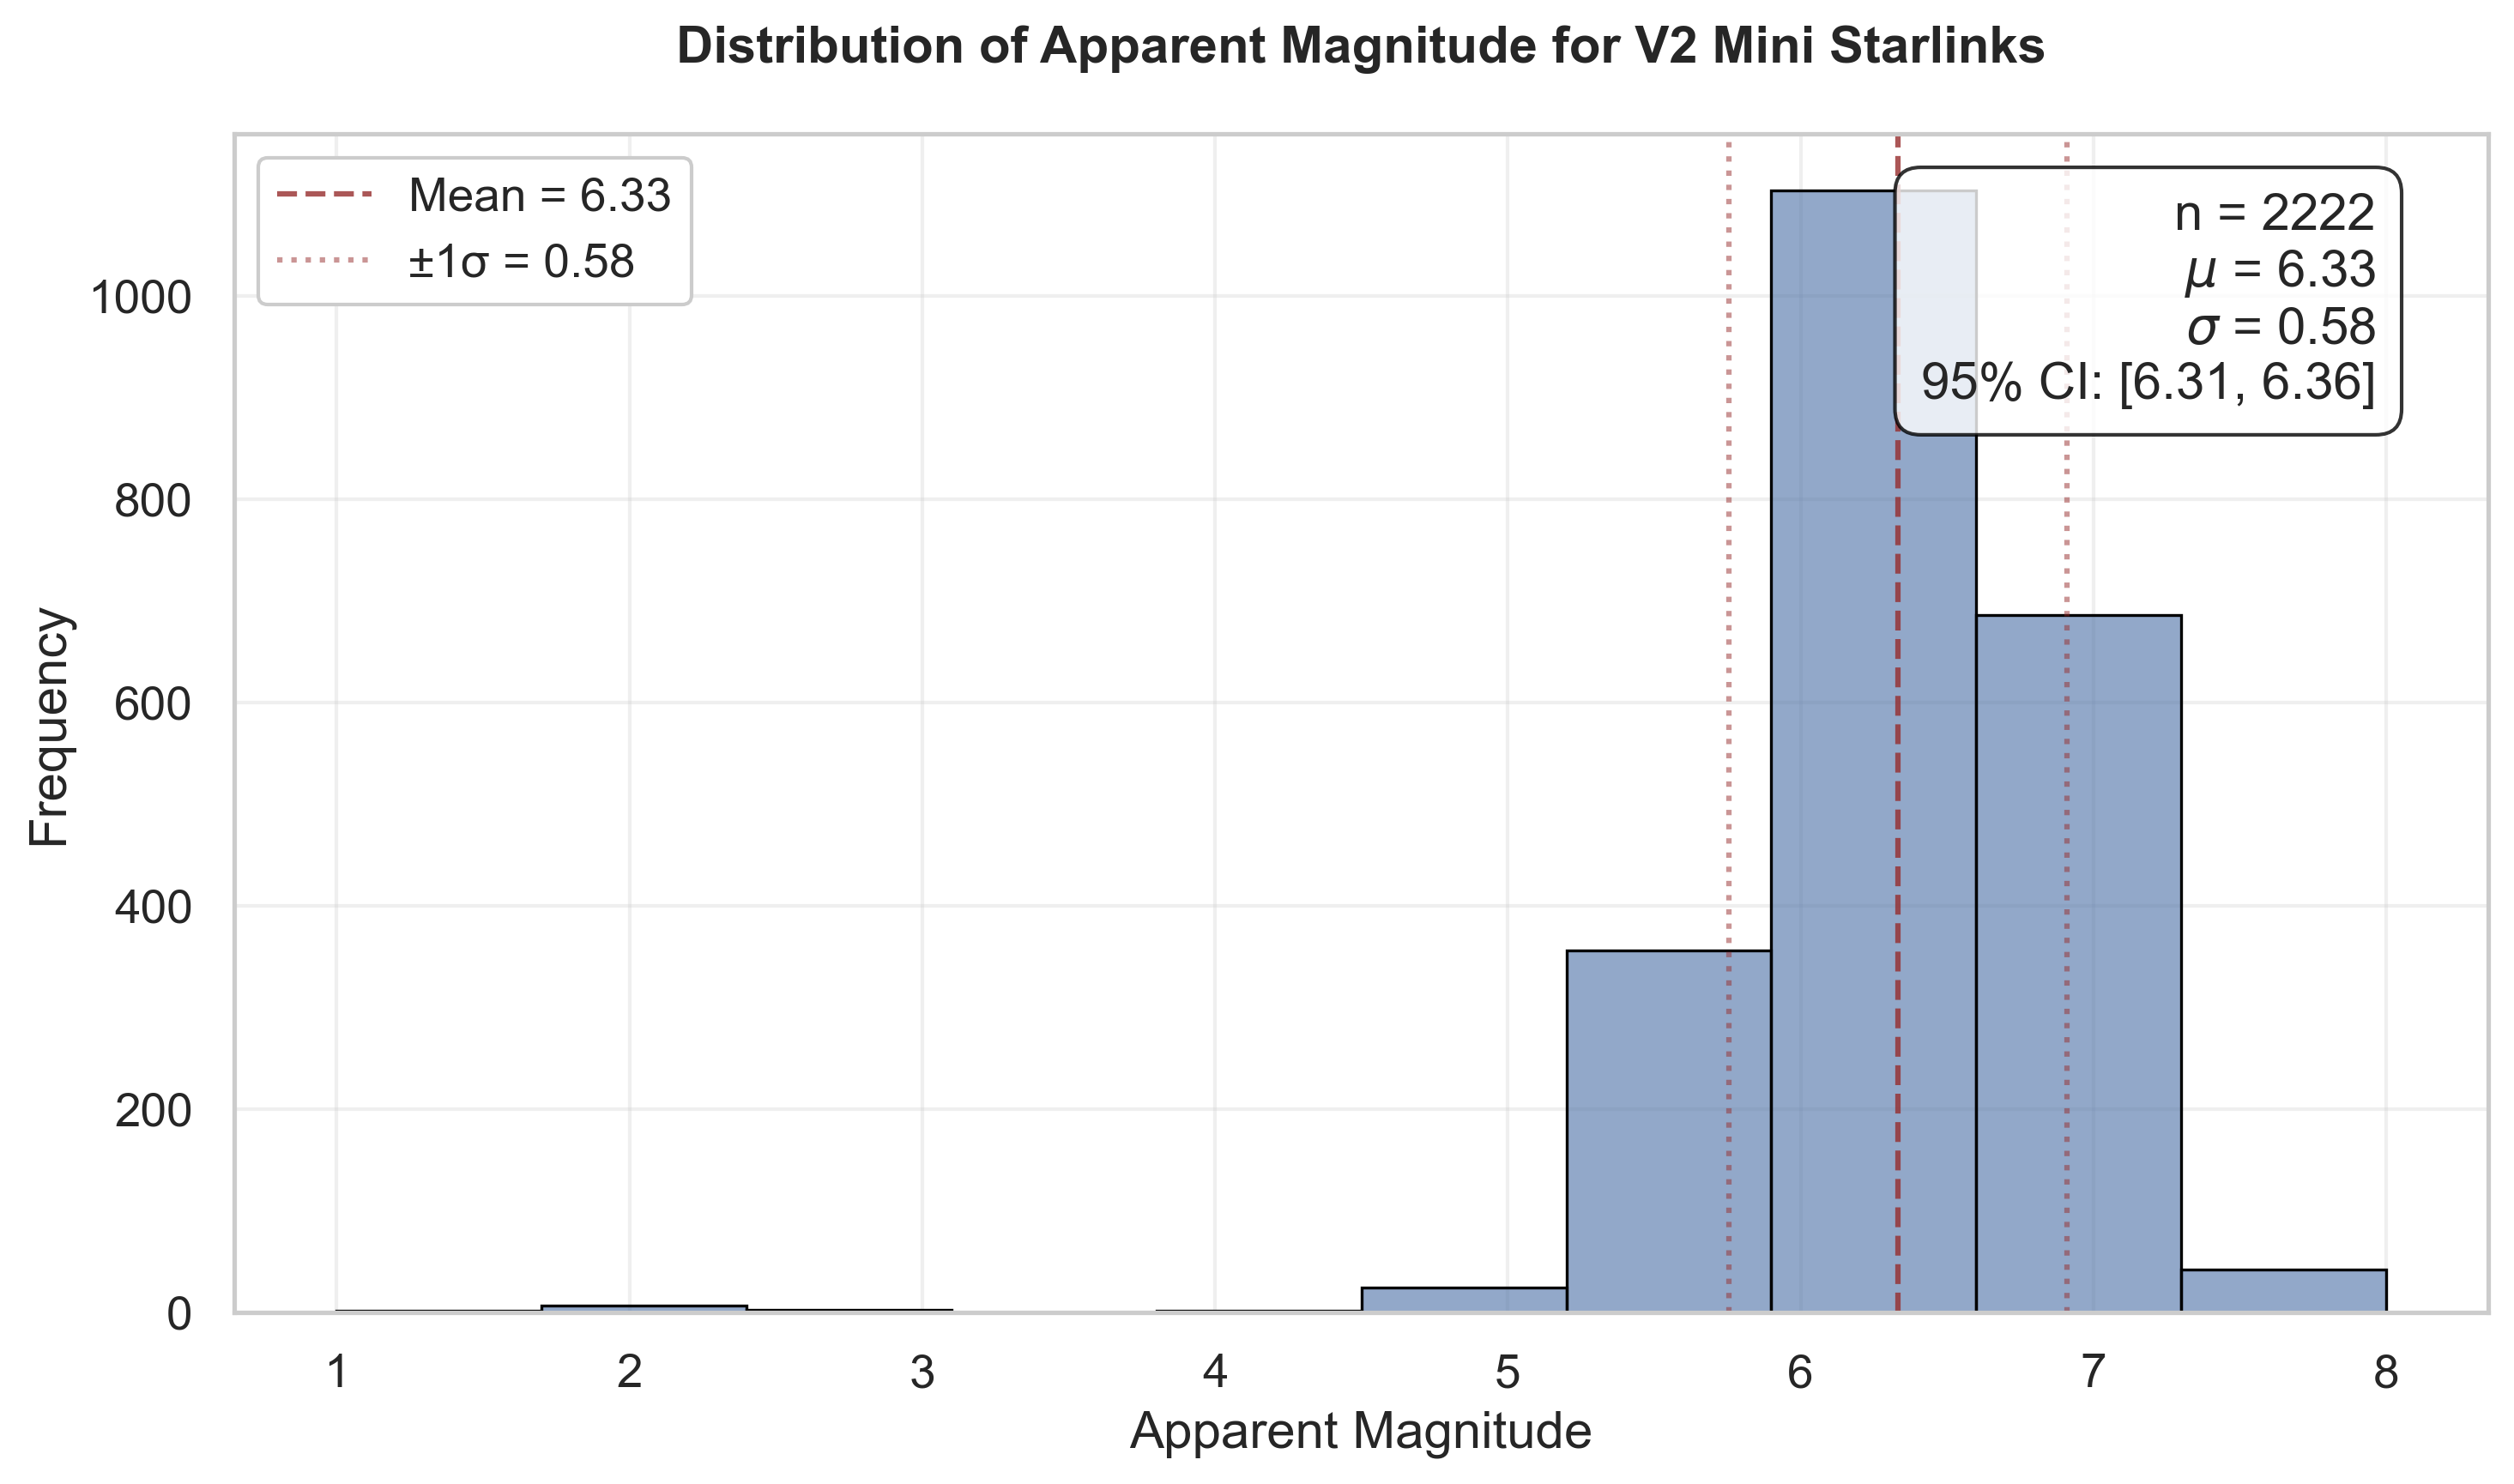

In [146]:
# Create figure and axis
fig, ax = plt.subplots(figsize=(10, 6), dpi=300)

# Get the data for V1.5 group
data = grp.get_group("v2mini")['apparent_magnitude']
mean = data.mean()
std = data.std()
n = len(data)

sns.histplot(data=data,
            bins=10,
            stat='count',
            color='#4A6FA5',
            alpha=0.6,
            edgecolor='black',
            linewidth=0.8)

# Add mean and ±1 std dev lines
ax.axvline(mean, color='#962D2D', linestyle='--', alpha=0.8, 
           label=f'Mean = {mean:.2f}')
ax.axvline(mean + std, color='#962D2D', linestyle=':', alpha=0.5,
           label=f'±1σ = {std:.2f}')
ax.axvline(mean - std, color='#962D2D', linestyle=':', alpha=0.5)

# Calculate confidence interval
ci = stats.norm.interval(0.95, loc=mean, scale=std/np.sqrt(n))

# Customize axes
ax.set_xlabel('Apparent Magnitude')
ax.set_ylabel('Count')
ax.set_title('Distribution of Apparent Magnitude for V2 Mini Starlinks', 
             pad=20, fontweight='bold')

stats_text = (
    f'n = {n}\n'
    f'$\mu$ = {mean:.2f}\n'
    f'$\sigma$ = {std:.2f}\n'
    f'95% CI: [{ci[0]:.2f}, {ci[1]:.2f}]'
)

plt.text(0.95, 0.95, stats_text,
         transform=ax.transAxes,
         verticalalignment='top',
         horizontalalignment='right',
         bbox=dict(facecolor='white', 
                  edgecolor='black',
                  alpha=0.8,
                  boxstyle='round,pad=0.5'))

# Add legend
ax.legend(frameon=True, facecolor='white', framealpha=1)

# Adjust layout
plt.tight_layout()

plt.show()

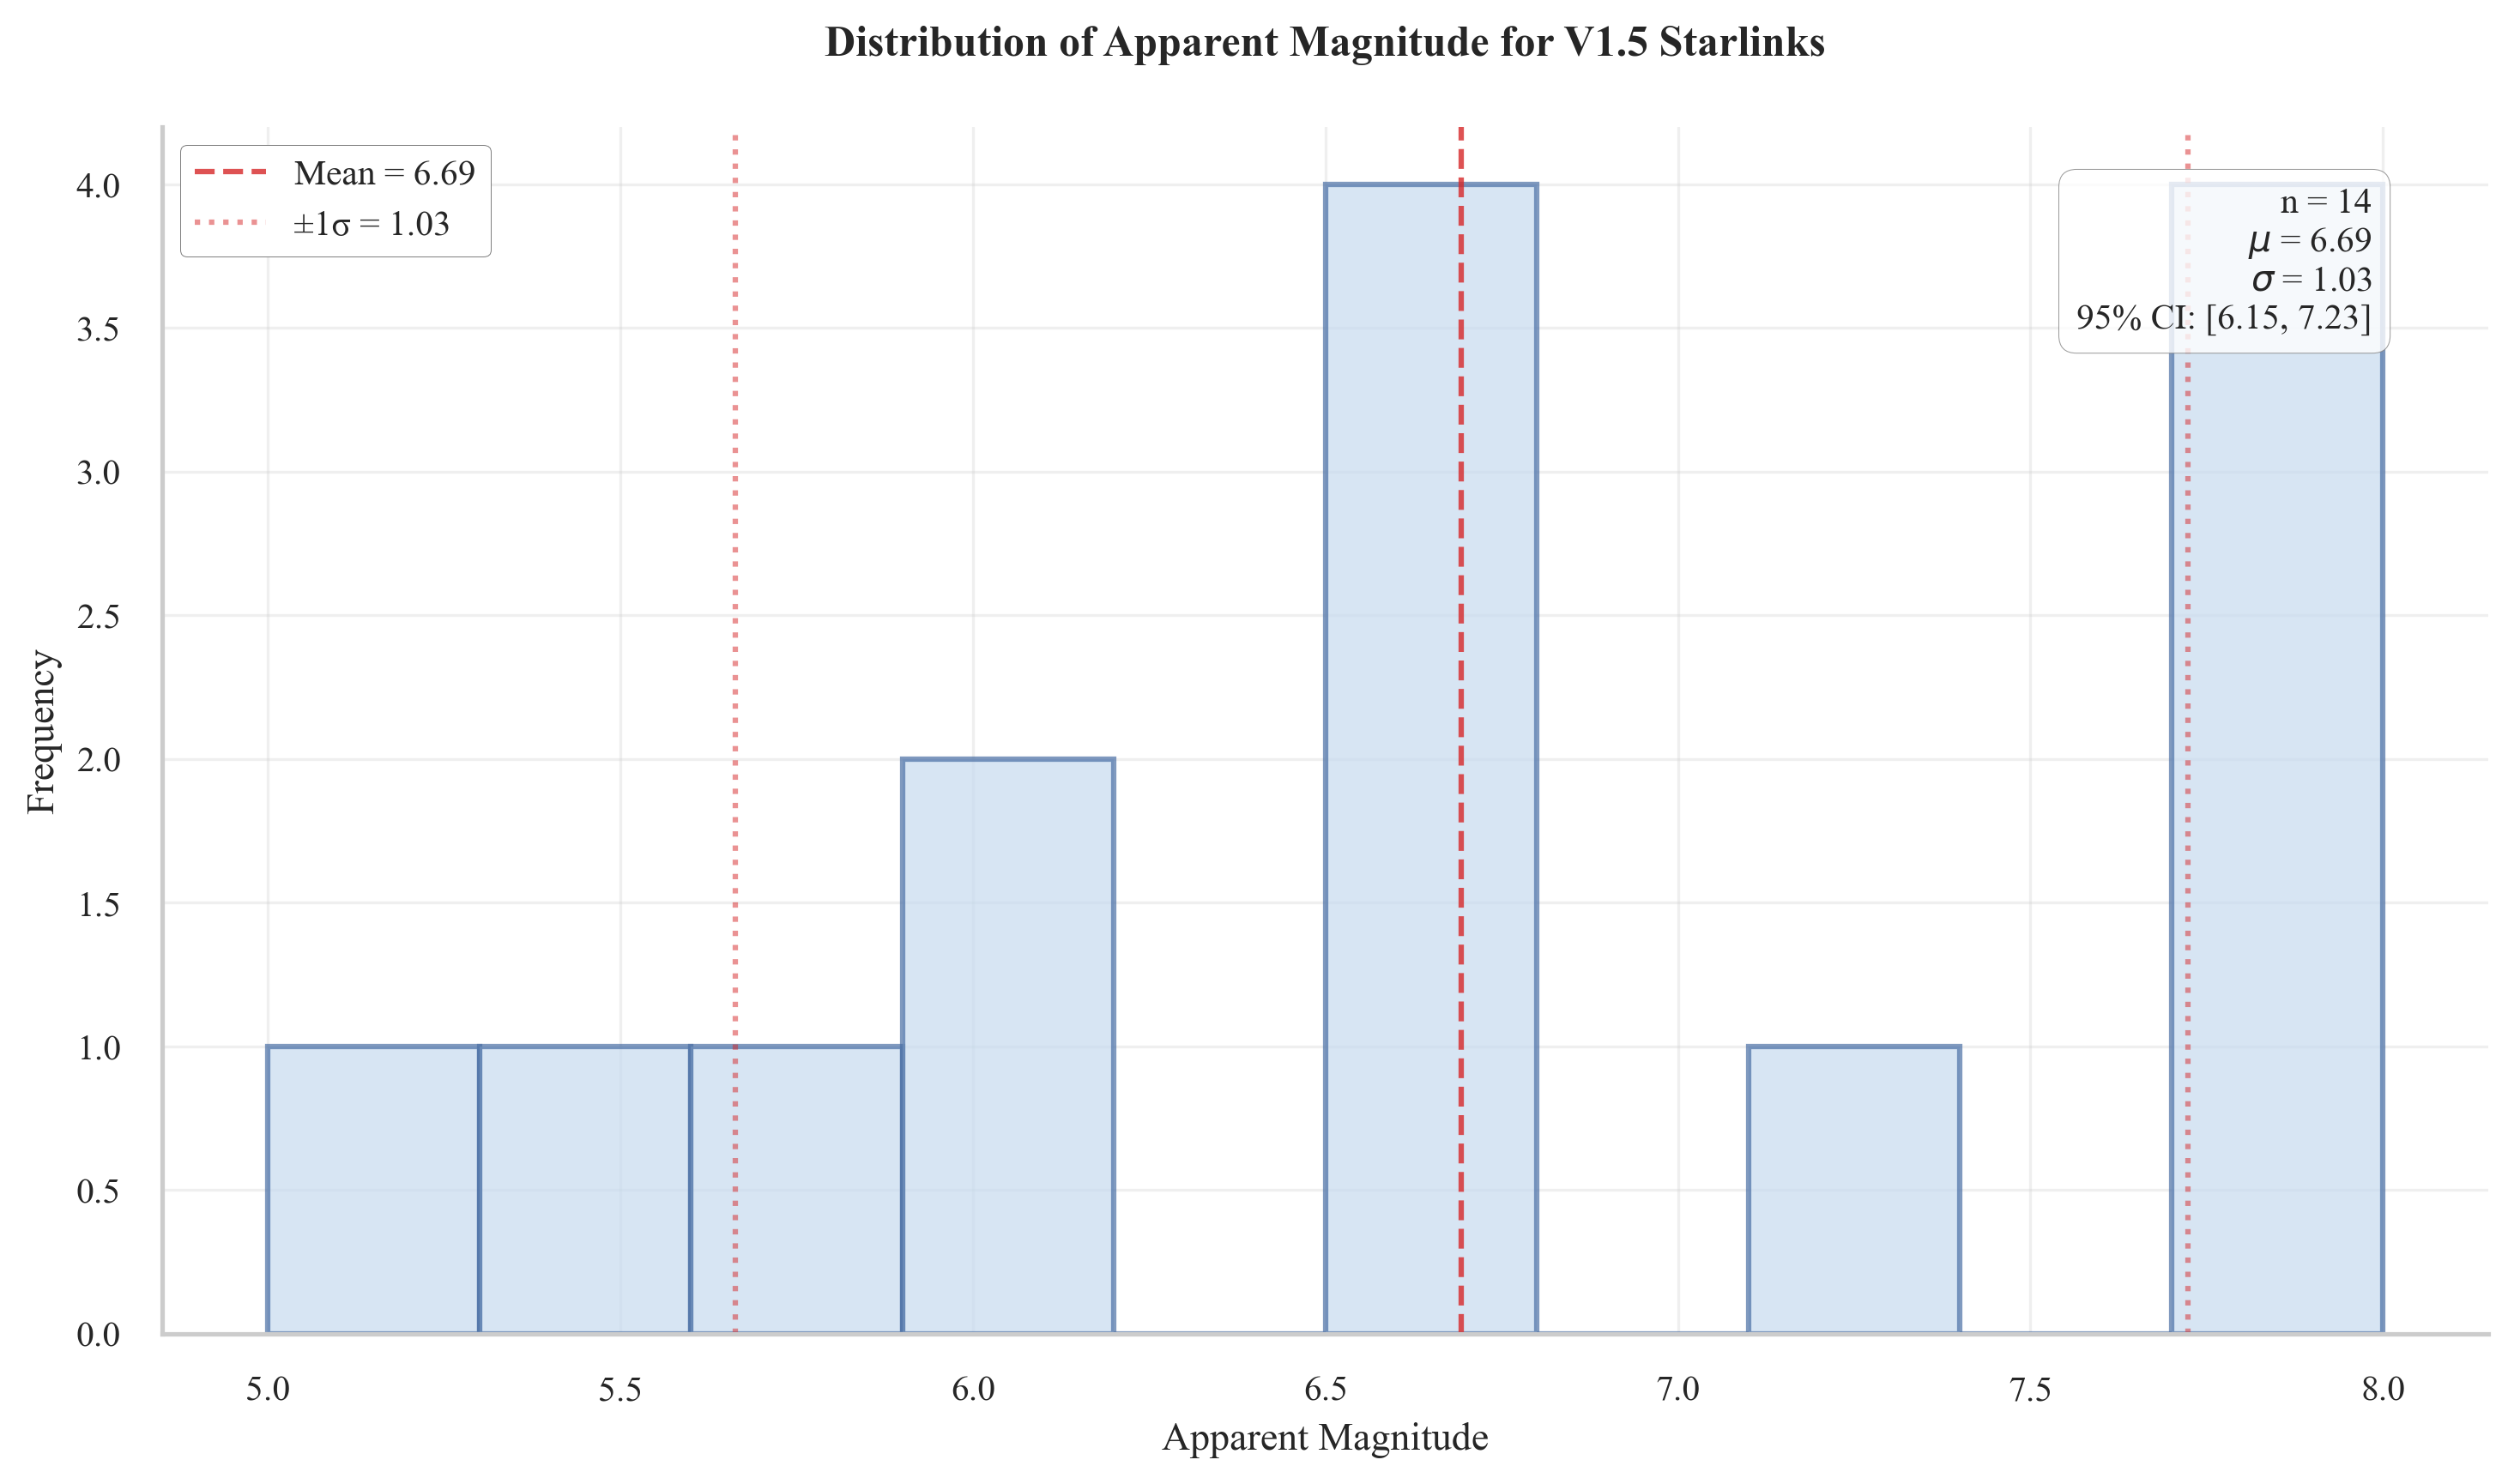

In [147]:
plt.style.use('seaborn-v0_8-paper')
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman']
plt.rcParams['grid.alpha'] = 0.3

fig, ax = plt.subplots(figsize=(10, 6), dpi=300)

data = grp.get_group("v1.5")['apparent_magnitude']
mean = data.mean()
std = data.std()
n = len(data)

hist = ax.hist(data, 
               bins=10,
               edgecolor='#4a6fa5',
               color='#c6dbef', 
               alpha=0.7,
               linewidth=1.5)

ax.axvline(mean, color='#d62728', linestyle='--', alpha=0.8, 
           label=f'Mean = {mean:.2f}', linewidth=1.5)
ax.axvline(mean + std, color='#d62728', linestyle=':', alpha=0.5,
           label=f'±1σ = {std:.2f}', linewidth=1.5)
ax.axvline(mean - std, color='#d62728', linestyle=':', alpha=0.5, linewidth=1.5)

ci = stats.norm.interval(0.95, loc=mean, scale=std/np.sqrt(n))

ax.set_xlabel('Apparent Magnitude', fontsize=11)
ax.set_ylabel('Count', fontsize=11)
ax.set_title('Distribution of Apparent Magnitude for V1.5 Starlinks', 
             pad=20, fontweight='bold', fontsize=12)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(labelsize=10)

stats_text = (
    f'n = {n}\n'
    f'$\mu$ = {mean:.2f}\n'
    f'$\sigma$ = {std:.2f}\n'
    f'95% CI: [{ci[0]:.2f}, {ci[1]:.2f}]'
)

plt.text(0.95, 0.95, stats_text,
         transform=ax.transAxes,
         verticalalignment='top',
         horizontalalignment='right',
         bbox=dict(facecolor='white', 
                  edgecolor='gray',
                  alpha=0.8,
                  boxstyle='round,pad=0.5'),
         fontsize=10)

legend = ax.legend(frameon=True, 
                  facecolor='white', 
                  edgecolor='gray',
                  framealpha=1,
                  fontsize=10)

plt.tight_layout()

# Save 
# plt.savefig('magnitude_distribution.pdf', dpi=300, bbox_inches='tight')
# plt.savefig('magnitude_distribution.png', dpi=300, bbox_inches='tight')

plt.show()

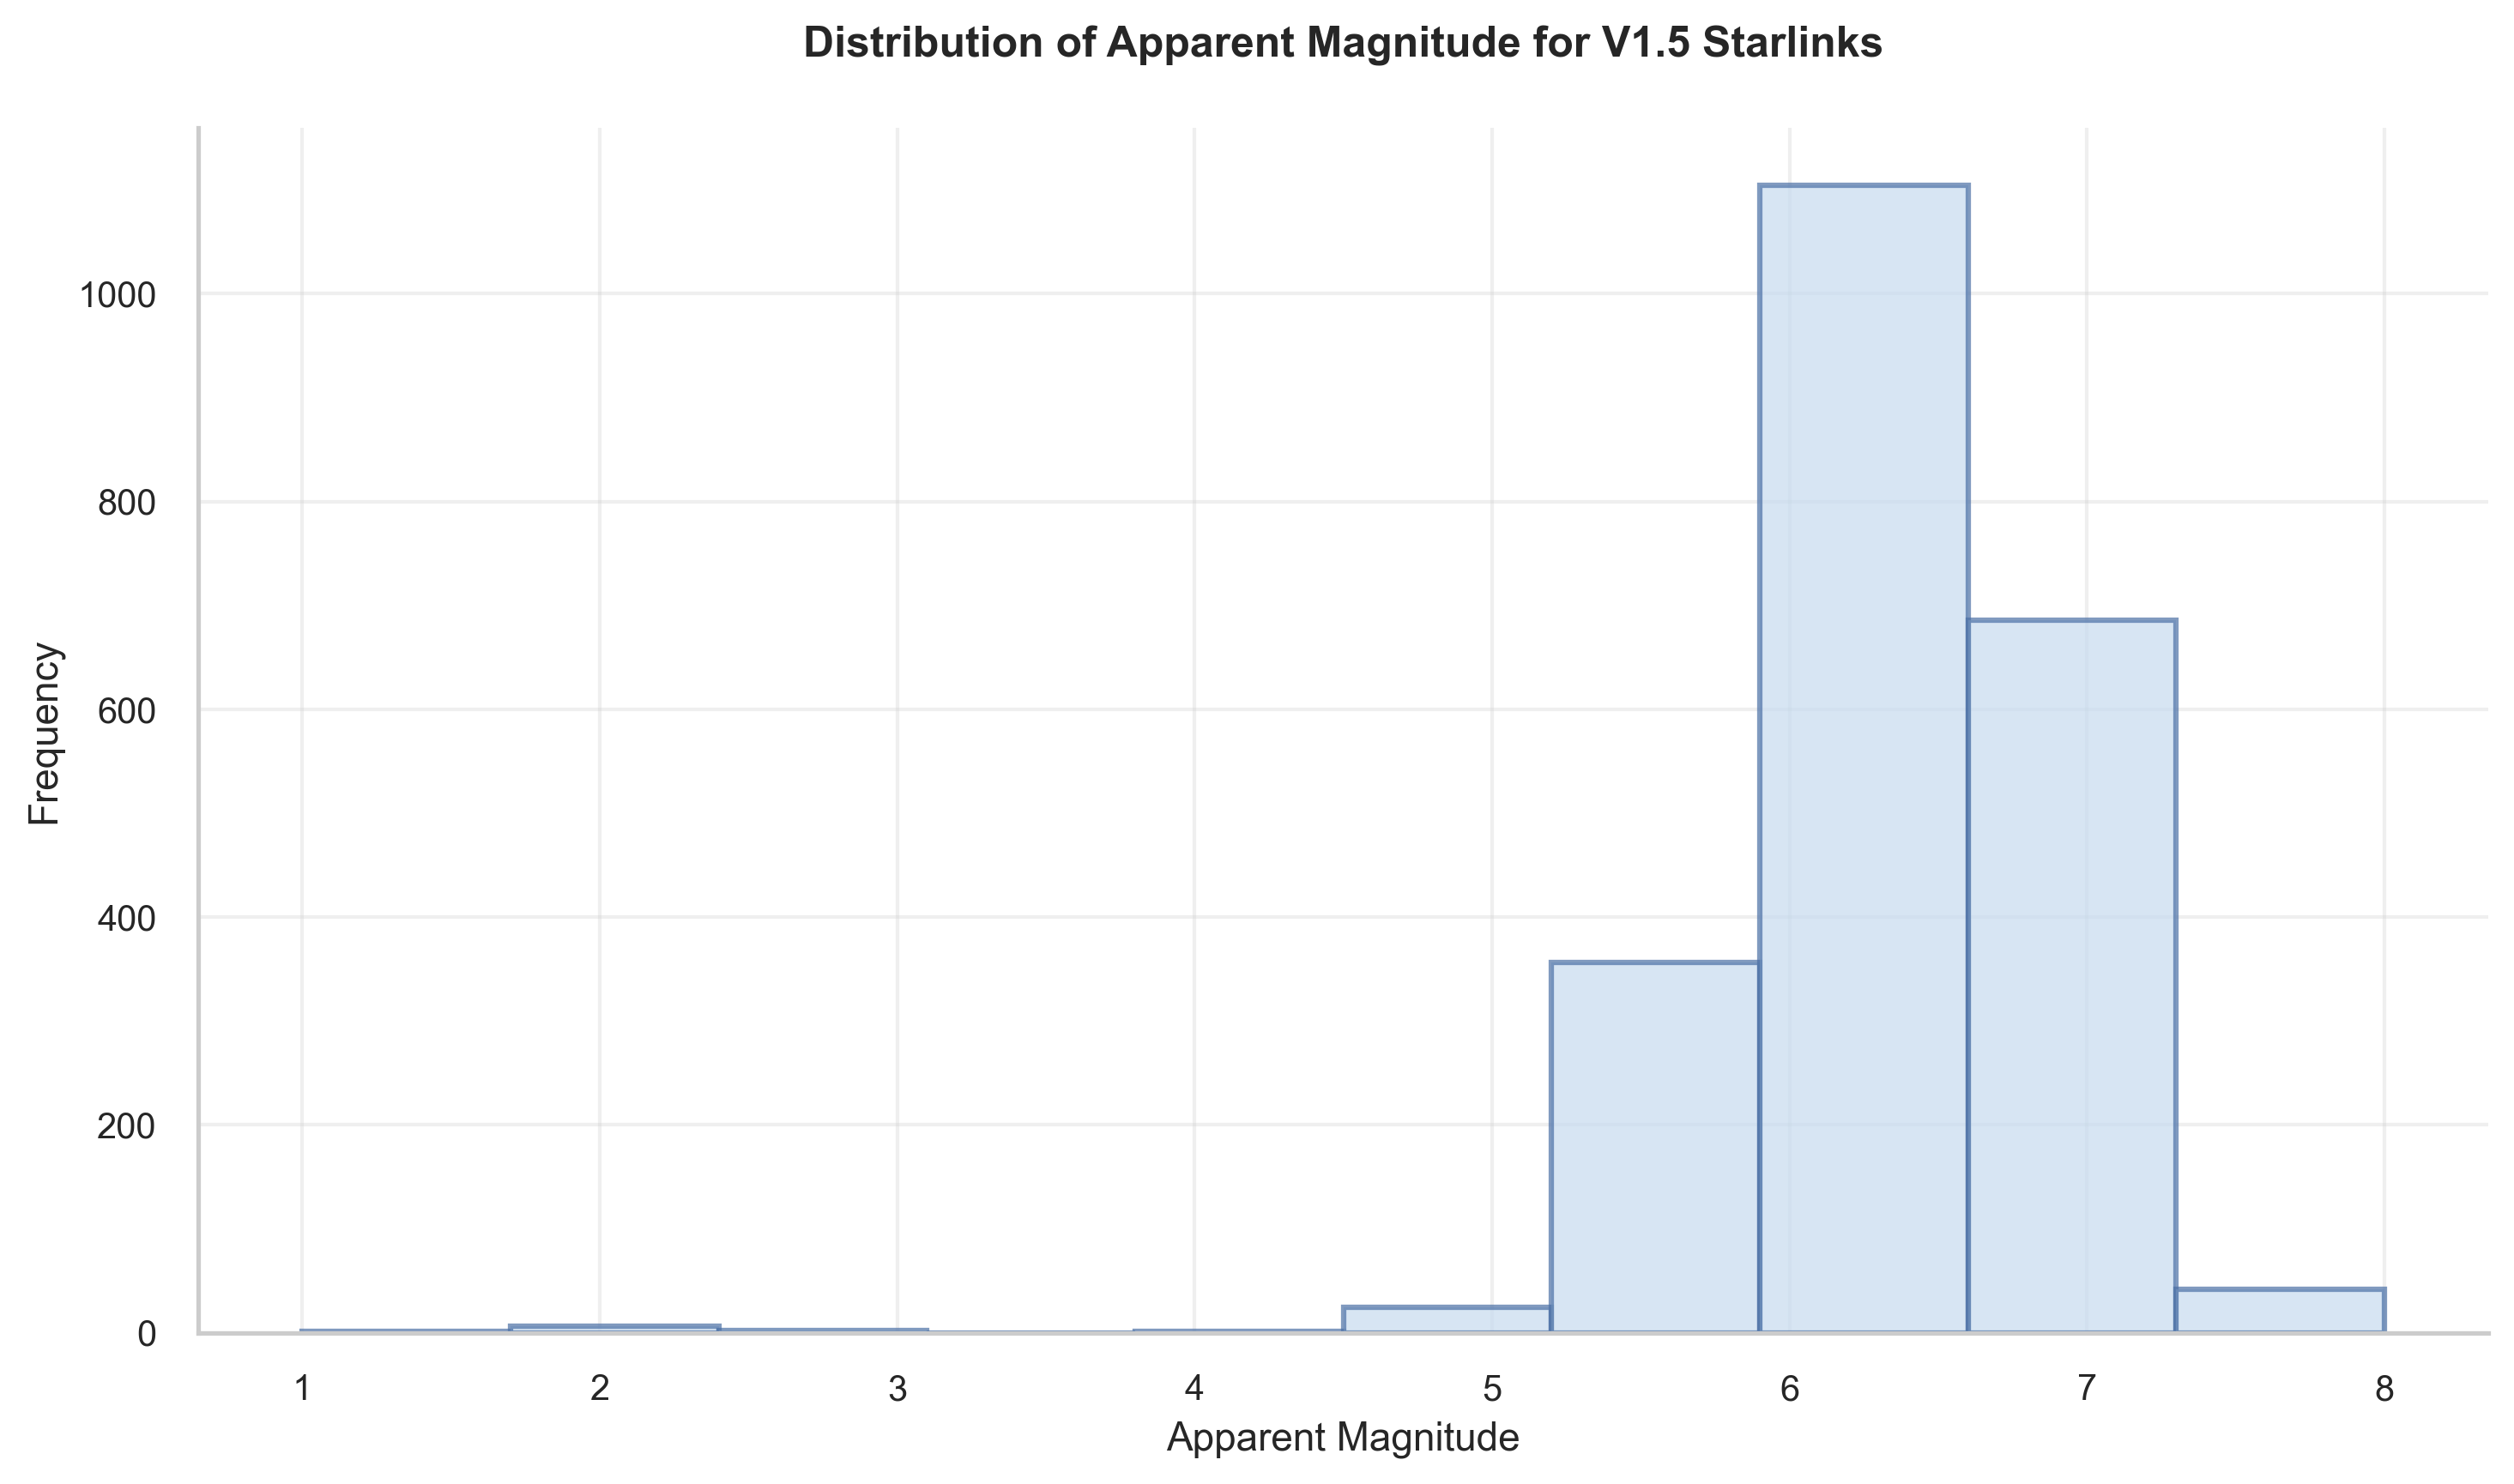

In [157]:
fig, ax = plt.subplots(figsize=(10, 6), dpi=300)

data = grp.get_group("v2mini")['apparent_magnitude']
mean = data.mean()
std = data.std()
n = len(data)

hist = ax.hist(data, 
               bins=10,
               edgecolor='#4a6fa5', 
               color='#c6dbef',    
               alpha=0.7,
               linewidth=1.5)

ci = stats.norm.interval(0.95, loc=mean, scale=std/np.sqrt(n))

# Customize axes with professional fonts
ax.set_xlabel('Apparent Magnitude', fontsize=11)
ax.set_ylabel('Count', fontsize=11)
ax.set_title('Distribution of Apparent Magnitude for V2 Mini Starlinks', 
             pad=20, fontweight='bold', fontsize=12)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(labelsize=10)

stats_text = (
    f'n = {n}\n'
    f'$\mu$ = {mean:.2f}\n'
    f'$\sigma$ = {std:.2f}\n'
    f'95% CI: [{ci[0]:.2f}, {ci[1]:.2f}]'
)

plt.tight_layout()

plt.show()

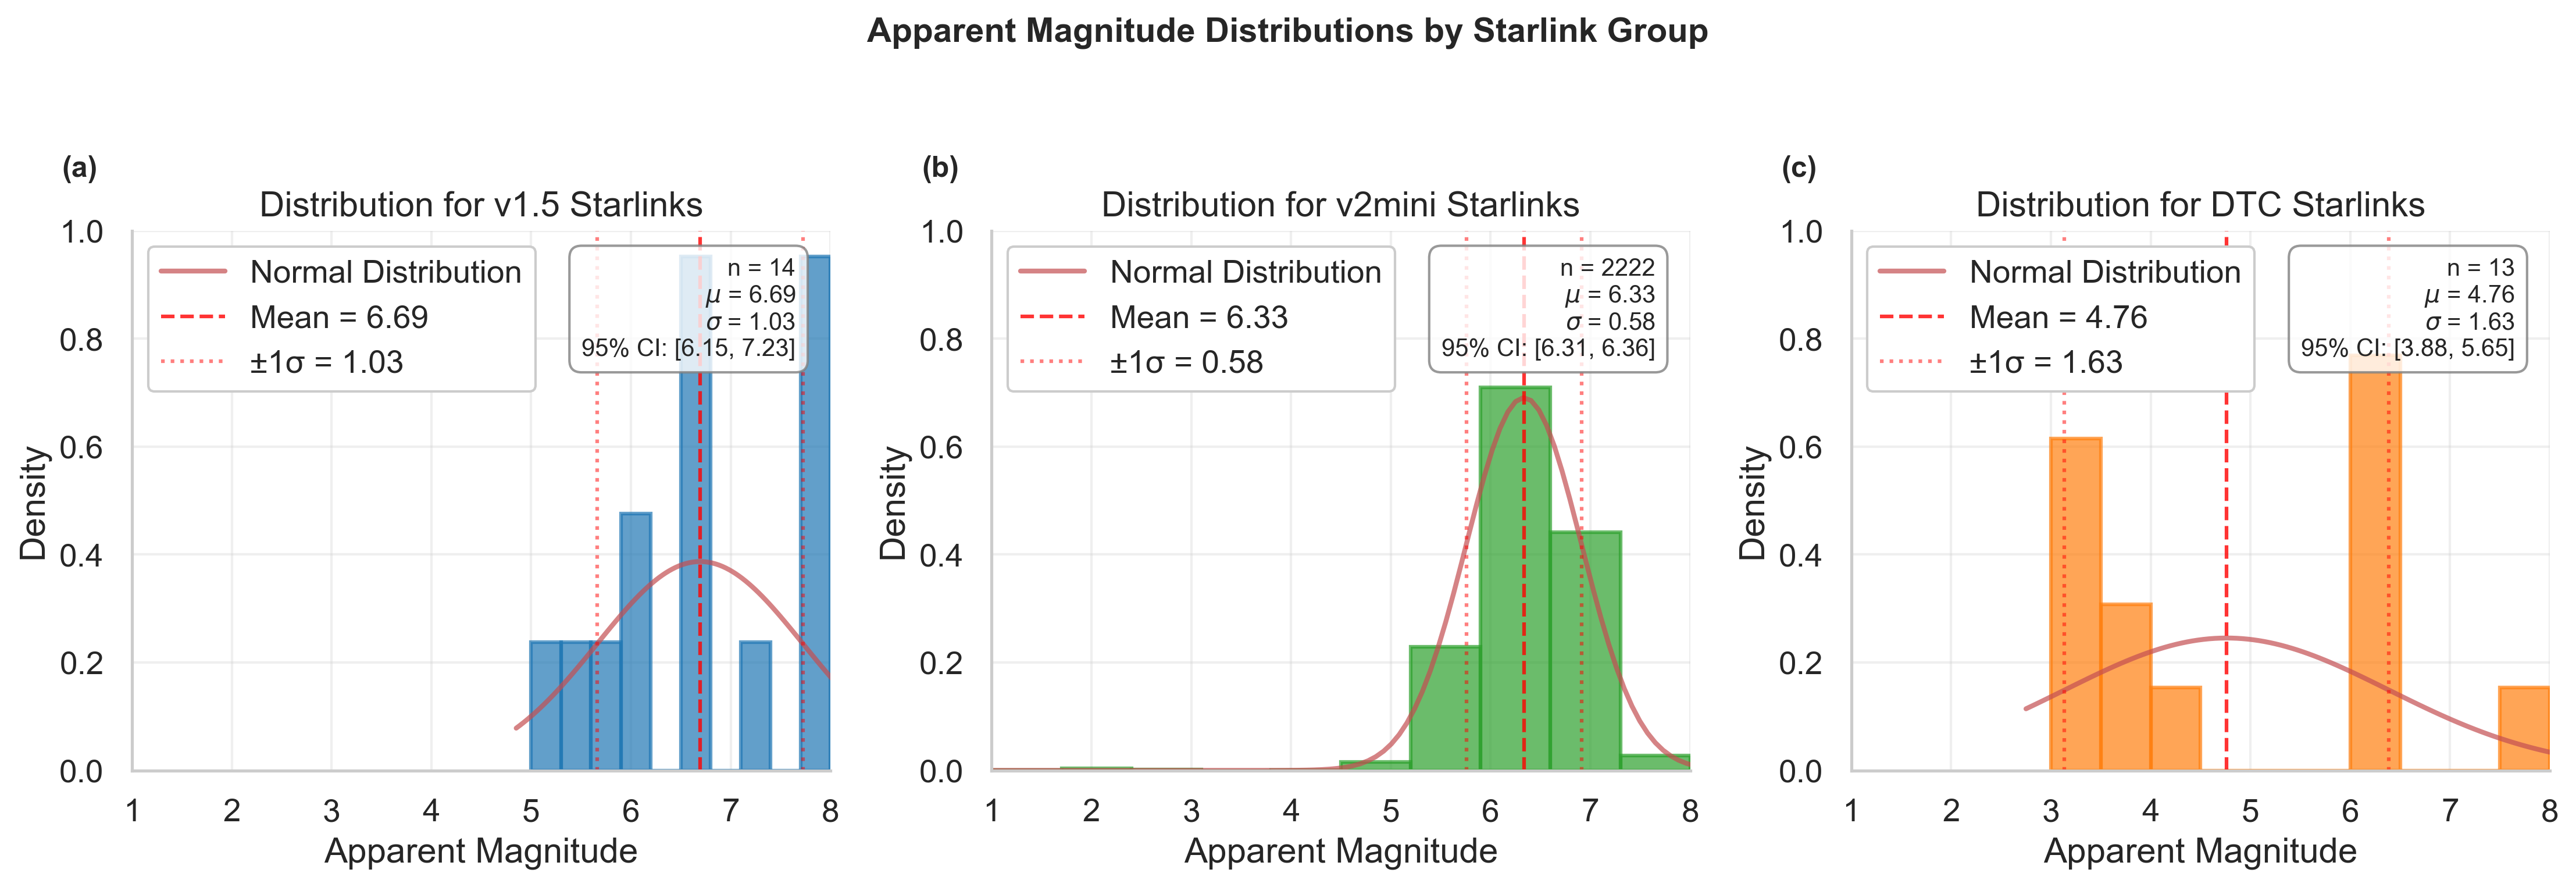

In [158]:
fig = plt.figure(figsize=(15, 5), dpi=300)
gs = fig.add_gridspec(1, 3)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[0, 2])
axes = [ax1, ax2, ax3]

groups = ['v1.5', 'v2mini', 'DTC']
colors = ['#1f77b4', '#2ca02c', '#ff7f0e']

for ax, group_name, color in zip(axes, groups, colors):
    data = grp.get_group(group_name)['apparent_magnitude']
    mean = data.mean()
    std = data.std()
    n = len(data)
    
    hist = ax.hist(data, 
                   bins=10,
                   density=True,  # normalize the histogram
                   edgecolor=color,
                   color=color,
                   alpha=0.7,
                   linewidth=1.5)
    
    # Add normal distribution curve
    xmin, xmax = ax.get_xlim()
    x = np.linspace(xmin, xmax, 100)
    p = stats.norm.pdf(x, mean, std)
    ax.plot(x, p, 'r-', lw=2, alpha=0.7, label='Normal Distribution')
    
    ax.axvline(mean, color='red', linestyle='--', alpha=0.8, 
               label=f'Mean = {mean:.2f}', linewidth=1.5)
    ax.axvline(mean + std, color='red', linestyle=':', alpha=0.5,
               label=f'±1σ = {std:.2f}', linewidth=1.5)
    ax.axvline(mean - std, color='red', linestyle=':', alpha=0.5, linewidth=1.5)
    
    ci = stats.norm.interval(0.95, loc=mean, scale=std/np.sqrt(n))
    
    stats_text = (
        f'n = {n}\n'
        f'$\mu$ = {mean:.2f}\n'
        f'$\sigma$ = {std:.2f}\n'
        f'95% CI: [{ci[0]:.2f}, {ci[1]:.2f}]'
    )
    
    ax.text(0.95, 0.95, stats_text,
            transform=ax.transAxes,
            verticalalignment='top',
            horizontalalignment='right',
            bbox=dict(facecolor='white', 
                     edgecolor='gray',
                     alpha=0.8,
                     boxstyle='round,pad=0.5'),
            fontsize=10)
    
    ax.set_xlabel('Apparent Magnitude')
    ax.set_ylabel('Count') 
    ax.set_title(f'Distribution for {group_name} Starlinks')
    ax.legend(frameon=True, facecolor='white', framealpha=1)
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

all_data = pd.concat([grp.get_group(g)['apparent_magnitude'] for g in groups])
global_min = all_data.min()
global_max = all_data.max()
max_density = max(ax.get_ylim()[1] for ax in axes)

for ax in axes:
    ax.set_xlim(global_min, global_max)
    ax.set_ylim(0, max_density)

for idx, ax in enumerate(axes):
    ax.text(-0.1, 1.1, f'({chr(97+idx)})', 
            transform=ax.transAxes, 
            fontsize=12, 
            fontweight='bold')

plt.suptitle('Apparent Magnitude Distributions by Starlink Group', 
             fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()

plt.show()

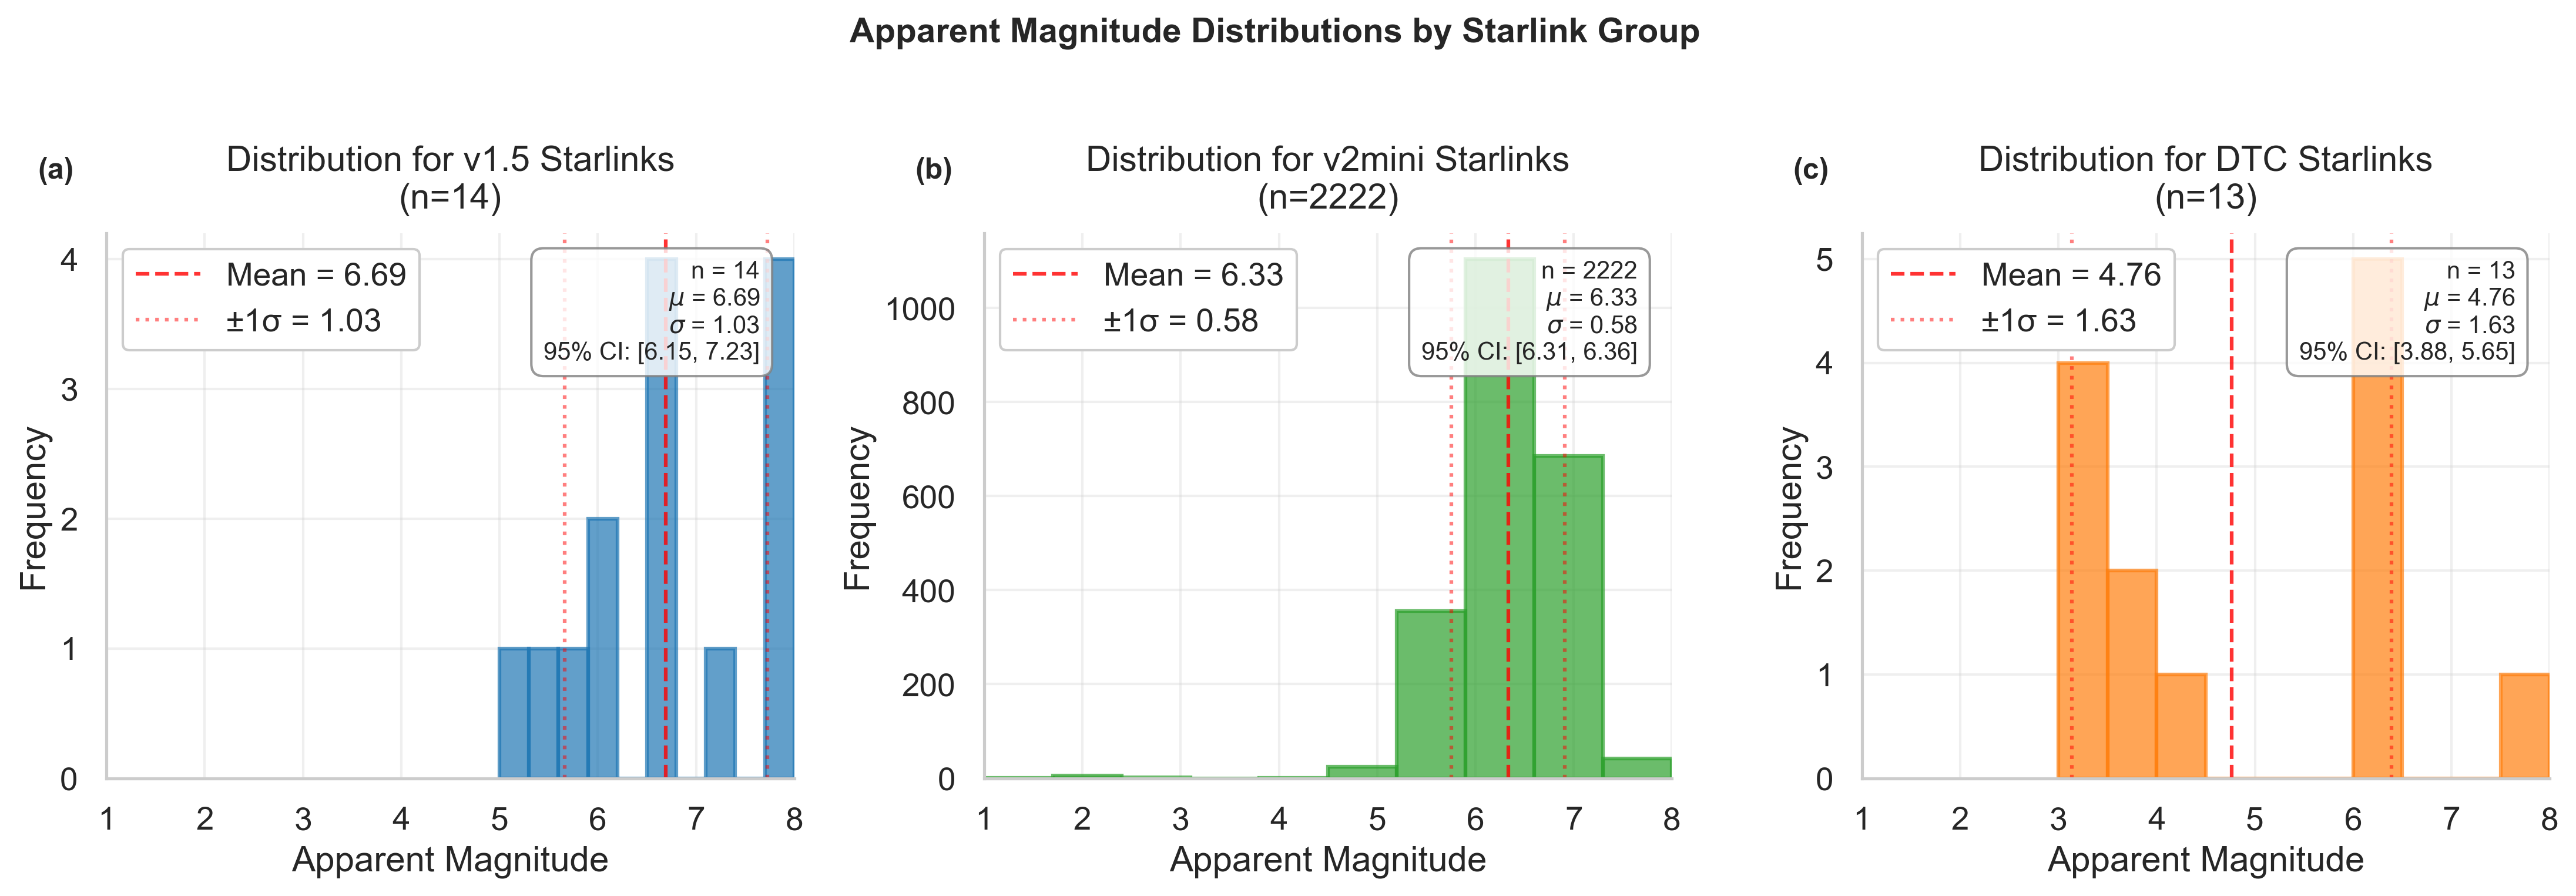

In [159]:
fig = plt.figure(figsize=(15, 5), dpi=300)
gs = fig.add_gridspec(1, 3)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[0, 2])
axes = [ax1, ax2, ax3]

groups = ['v1.5', 'v2mini', 'DTC']
colors = ['#1f77b4', '#2ca02c', '#ff7f0e']

all_data = pd.concat([grp.get_group(g)['apparent_magnitude'] for g in groups])
global_min = all_data.min()
global_max = all_data.max()

for ax, group_name, color in zip(axes, groups, colors):
    data = grp.get_group(group_name)['apparent_magnitude']
    mean = data.mean()
    std = data.std()
    n = len(data)
    
    hist = ax.hist(data, 
                   bins=10,
                   edgecolor=color,
                   color=color,
                   alpha=0.7,
                   linewidth=1.5)
    
    ax.axvline(mean, color='red', linestyle='--', alpha=0.8, 
               label=f'Mean = {mean:.2f}', linewidth=1.5)
    ax.axvline(mean + std, color='red', linestyle=':', alpha=0.5,
               label=f'±1σ = {std:.2f}', linewidth=1.5)
    ax.axvline(mean - std, color='red', linestyle=':', alpha=0.5, linewidth=1.5)
    
    ci = stats.norm.interval(0.95, loc=mean, scale=std/np.sqrt(n))
    
    stats_text = (
        f'n = {n}\n'
        f'$\mu$ = {mean:.2f}\n'
        f'$\sigma$ = {std:.2f}\n'
        f'95% CI: [{ci[0]:.2f}, {ci[1]:.2f}]'
    )
    
    ax.text(0.95, 0.95, stats_text,
            transform=ax.transAxes,
            verticalalignment='top',
            horizontalalignment='right',
            bbox=dict(facecolor='white', 
                     edgecolor='gray',
                     alpha=0.8,
                     boxstyle='round,pad=0.5'),
            fontsize=10)
    
    ax.set_xlabel('Apparent Magnitude')
    ax.set_ylabel('Count')
    ax.set_title(f'Distribution for {group_name} Starlinks\n(n={n})', pad=10)  # Added sample size to title
    ax.legend(frameon=True, facecolor='white', framealpha=1)
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    ax.set_xlim(global_min, global_max)

for idx, ax in enumerate(axes):
    ax.text(-0.1, 1.1, f'({chr(97+idx)})', 
            transform=ax.transAxes, 
            fontsize=12, 
            fontweight='bold')

plt.suptitle('Apparent Magnitude Distributions by Starlink Group', 
             fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()

plt.show()

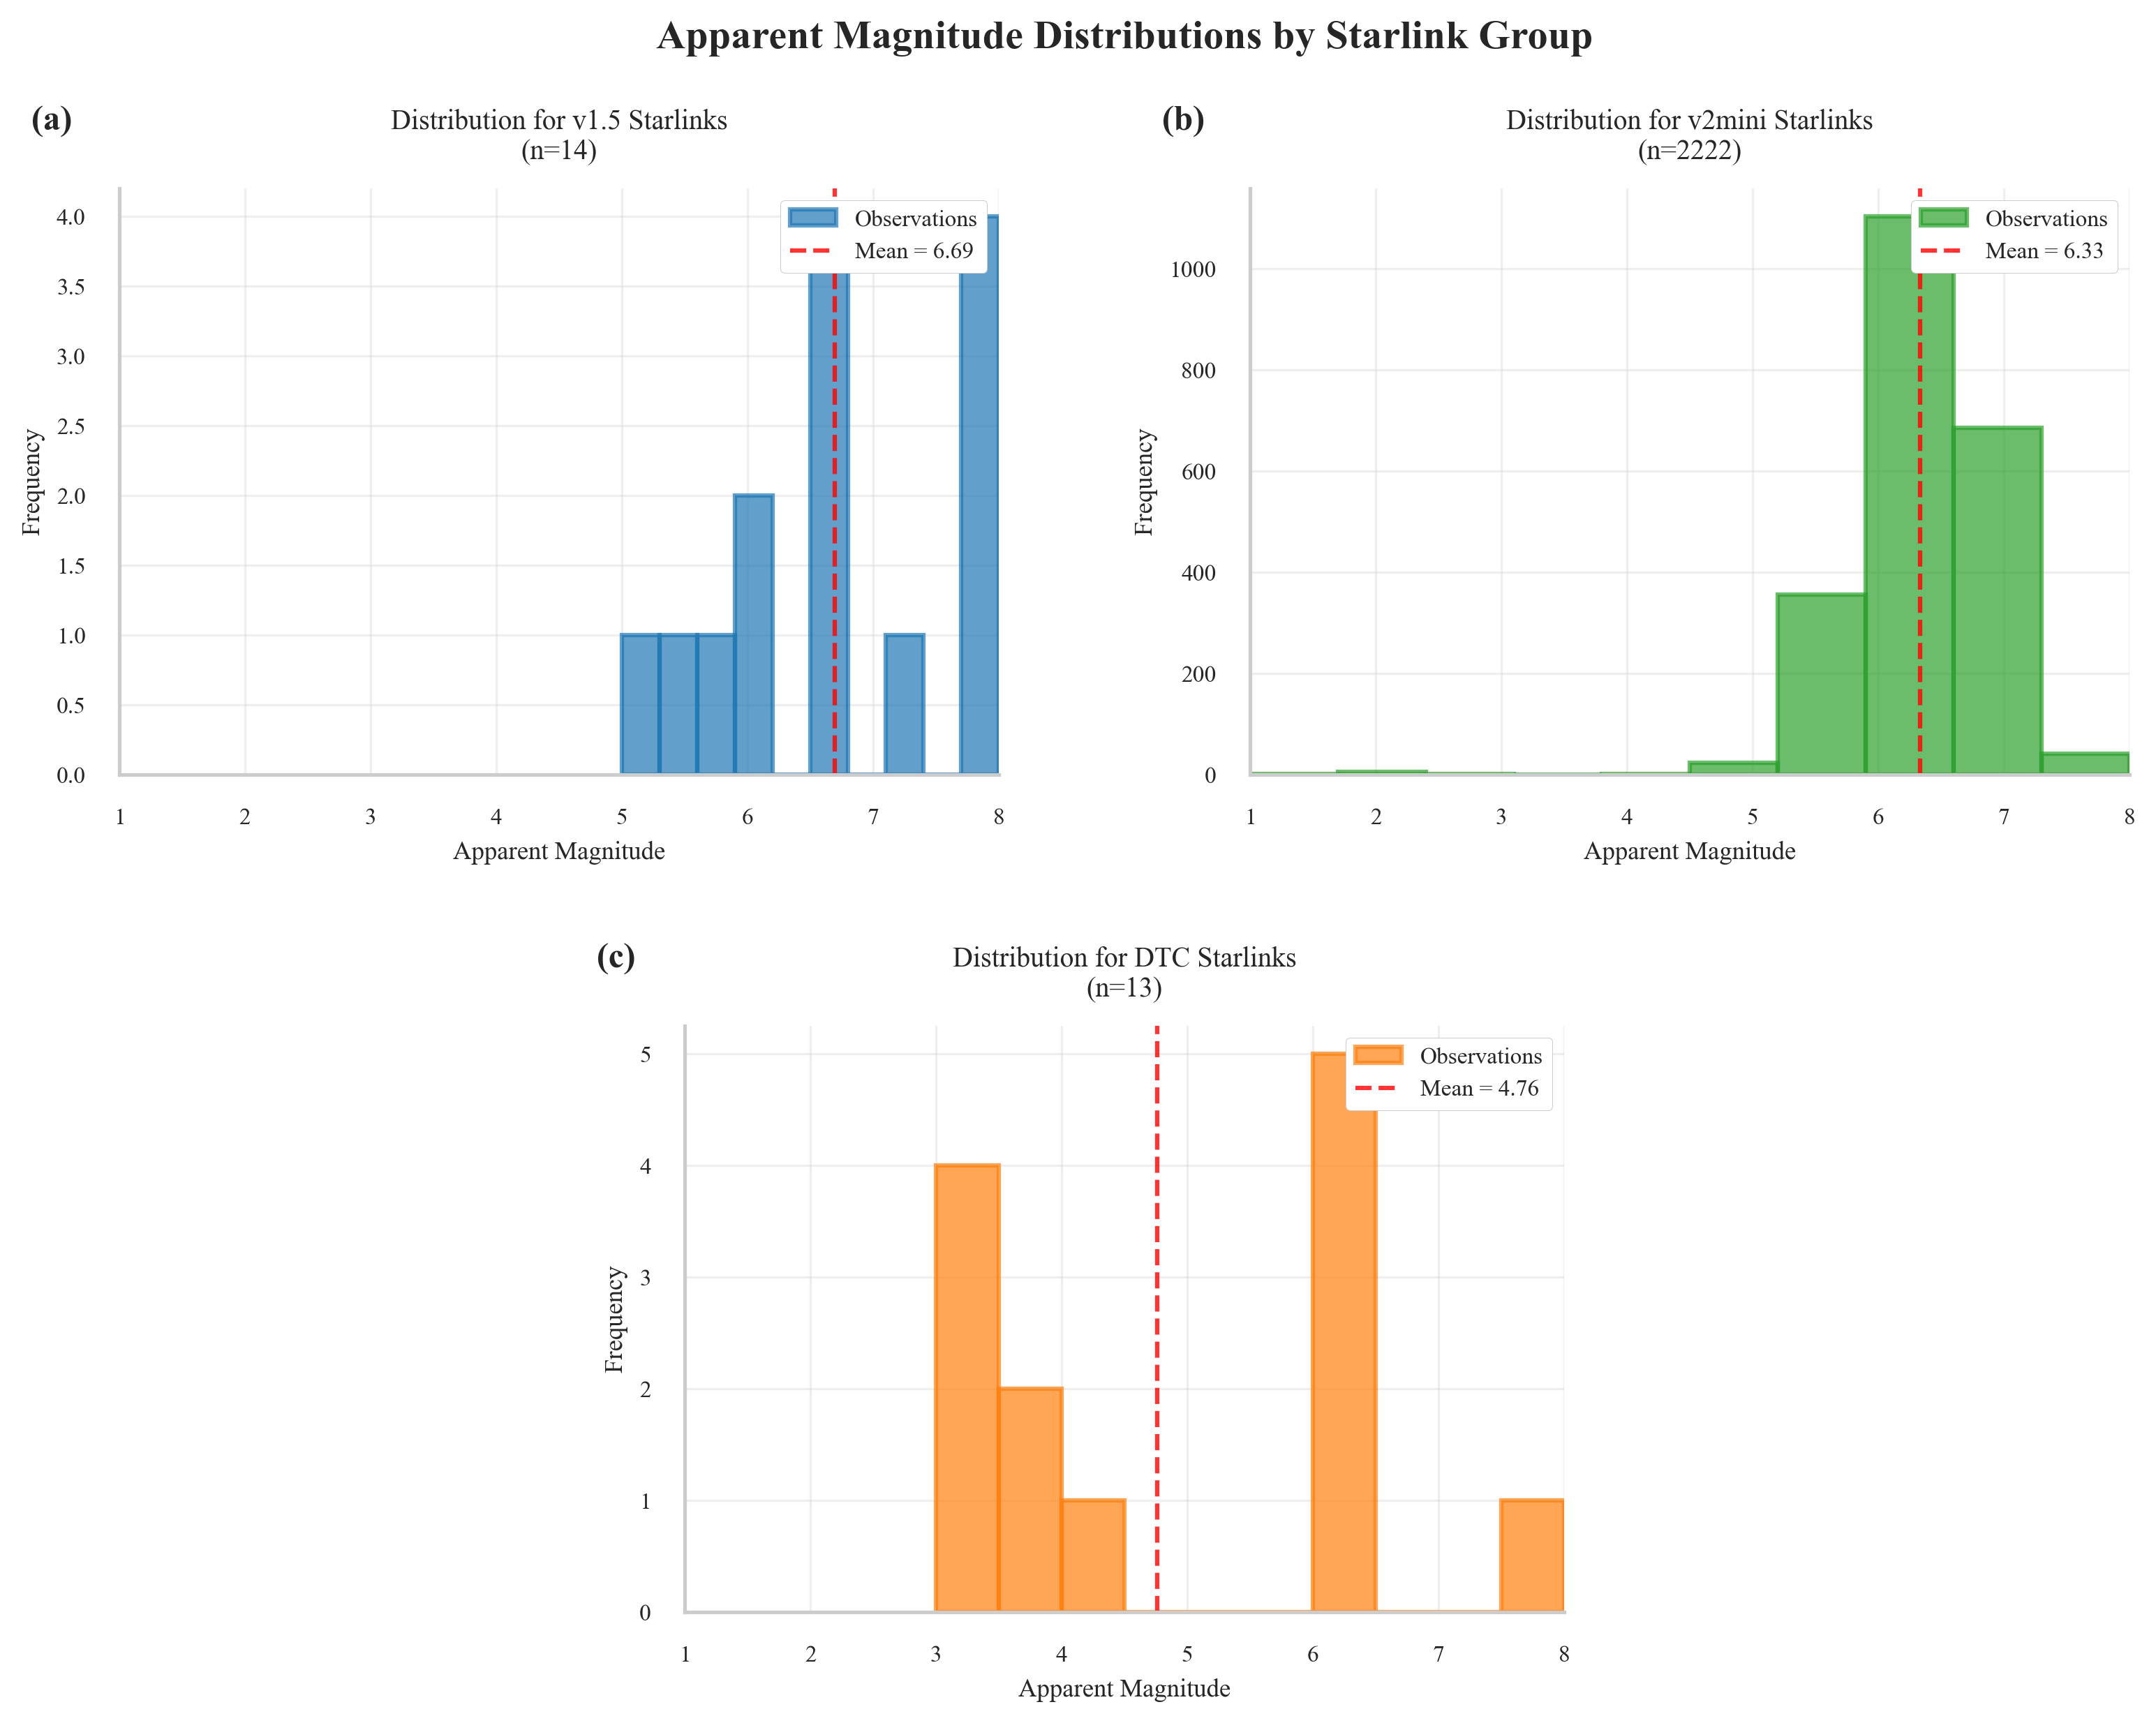

In [154]:
fig = plt.figure(figsize=(12, 8), dpi=300)

# [left, bottom, width, height]
ax1 = plt.axes([0.1, 0.5, 0.35, 0.35])      # top left
ax2 = plt.axes([0.55, 0.5, 0.35, 0.35])     # top right
ax3 = plt.axes([0.325, 0, 0.35, 0.35])   # bottom center
axes = [ax1, ax2, ax3]

groups = ['v1.5', 'v2mini', 'DTC']
colors = ['#1f77b4', '#2ca02c', '#ff7f0e']

all_data = pd.concat([grp.get_group(g)['apparent_magnitude'] for g in groups])
global_min = all_data.min()
global_max = all_data.max()

for ax, group_name, color in zip(axes, groups, colors):
    data = grp.get_group(group_name)['apparent_magnitude']
    mean = data.mean()
    n = len(data)
    
    hist = ax.hist(data, 
                   bins=10,
                   edgecolor=color,
                   color=color,
                   alpha=0.7,
                   linewidth=1.5,
                   label='Observations') 
    
    ax.axvline(mean, color='red', linestyle='--', alpha=0.8, 
               label=f'Mean = {mean:.2f}', linewidth=1.5)
    
    ax.set_xlabel('Apparent Magnitude')
    ax.set_ylabel('Count')
    ax.set_title(f'Distribution for {group_name} Starlinks\n(n={n})', pad=10)
    ax.legend(frameon=True, facecolor='white', framealpha=1, loc='upper right')
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    ax.set_xlim(global_min, global_max)

for idx, ax in enumerate(axes):
    ax.text(-0.1, 1.1, f'({chr(97+idx)})', 
            transform=ax.transAxes, 
            fontsize=12, 
            fontweight='bold')

plt.suptitle('Apparent Magnitude Distributions by Starlink Group', 
             fontsize=14, fontweight='bold', y=0.95)

plt.show()

In [152]:
df2.columns

Index(['index', 'satellite_name', 'norad_cat_id', 'observation_time_utc',
       'observation_time_uncertainty_sec', 'apparent_magnitude',
       'apparent_magnitude_uncertainty', 'observer_latitude_deg',
       'observer_longitude_deg', 'observer_altitude_m', 'limiting_magnitude',
       'instrument', 'observing_mode', 'observing_filter', 'observer_orcid',
       'satellite_right_ascension_deg', 'satellite_declination_deg',
       'sigma_2_ra', 'sigma_ra_sigma_dec', 'sigma_2_dec',
       'range_to_satellite_km', 'range_to_satellite_uncertainty_km',
       'range_rate_of_satellite_km_per_sec',
       'range_rate_of_satellite_uncertainty_km_per_sec', 'comments',
       'data_archive_link', 'mpc_code', 'sat_ra_deg_satchecker',
       'sat_dec_deg_satchecker', 'range_to_sat_km_satchecker',
       'range_rate_sat_km_s_satchecker', 'ddec_deg_s_satchecker',
       'dra_cosdec_deg_s_satchecker', 'phase_angle_deg_satchecker',
       'alt_deg_satchecker', 'az_deg_satchecker', 'illuminated',
   

In [153]:
df2.to_csv('starlink_observations_gen.csv',index=False)